# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.duplicated(subset='ID').sum()

0

semua data customer adalah unik

# Conversion Rate Analysis Based on Income, Spending and Age

## Features Engineering

### Conversion Rate

In [7]:
df['CVR'] = df['Response']/df['NumWebVisitsMonth']

### Jumlah Anak

In [8]:
df['jumlah_anak'] = df['Kidhome']+df['Teenhome']

### Umur

In [9]:
df['umur'] = 2022 - df['Year_Birth']

### Total Transaksi

In [10]:
df['total_transaksi'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

### Total Pengeluaran

In [11]:
df['total_pengeluaran'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

### Customer Loyalty

In [12]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\177162232.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\177162232.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\177162232.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\177162232.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.


In [13]:
import datetime as dt

In [14]:
from datetime import datetime

In [15]:
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [16]:
max(df['Dt_Customer'].dt.year)

2014

In [17]:
df['month_cust'] = (pd.to_datetime('2015-01-01')-df['Dt_Customer'])/np.timedelta64(1, 'D')

# Exploratory Data Analysis

In [18]:
numeric = df.describe().columns.tolist()

In [19]:
numeric.remove('ID')

In [20]:
numeric.remove('Year_Birth')

In [21]:
columns = df.columns.tolist()

In [22]:
for i in numeric:
    columns.remove(i)

In [23]:
categorical = columns

In [24]:
categorical.remove('Year_Birth')

In [25]:
categorical.remove('ID')

In [26]:
categorical.remove('Dt_Customer')

## Descriptive Analysis

In [27]:
round(df.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,CVR,jumlah_anak,umur,total_transaksi,total_pengeluaran,month_cust
count,2240.0,2240.0,2216.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,...,2240.0,2240.0,2240.0,2240.0,2229.0,2240.0,2240.0,2240.0,2240.0,2240.0
mean,5592.0,1969.0,52247251.0,0.0,1.0,49.0,303936.0,26302.0,166950.0,37525.0,...,0.0,3.0,11.0,0.0,0.0,1.0,53.0,15.0,605798.0,538.0
std,3247.0,12.0,25173077.0,1.0,1.0,29.0,336597.0,39773.0,225715.0,54629.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,8.0,602249.0,232.0
min,0.0,1893.0,1730000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,11.0,0.0,0.0,0.0,26.0,0.0,5000.0,26.0
25%,2828.0,1959.0,35303000.0,0.0,0.0,24.0,23750.0,1000.0,16000.0,3000.0,...,0.0,3.0,11.0,0.0,0.0,0.0,45.0,8.0,68750.0,367.0
50%,5458.0,1970.0,51381500.0,0.0,0.0,49.0,173500.0,8000.0,67000.0,12000.0,...,0.0,3.0,11.0,0.0,0.0,1.0,52.0,15.0,396000.0,539.0
75%,8428.0,1977.0,68522000.0,1.0,1.0,74.0,504250.0,33000.0,232000.0,50000.0,...,0.0,3.0,11.0,0.0,0.0,1.0,63.0,21.0,1045500.0,711.0
max,11191.0,1996.0,666666000.0,2.0,2.0,99.0,1493000.0,199000.0,1725000.0,259000.0,...,1.0,3.0,11.0,1.0,1.0,3.0,129.0,44.0,2525000.0,1089.0


## Univariate Analysis

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\769156113.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


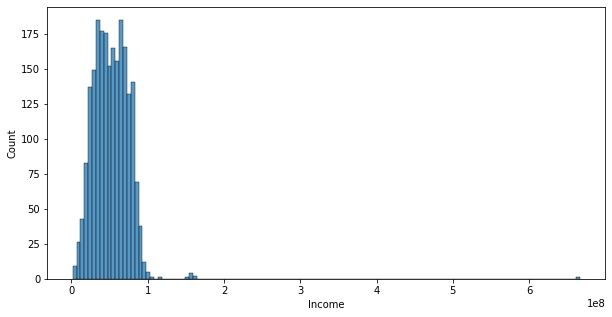

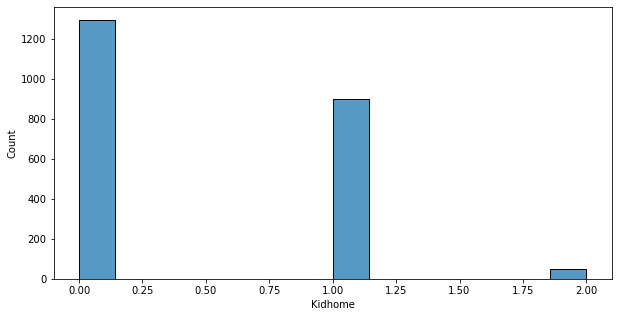

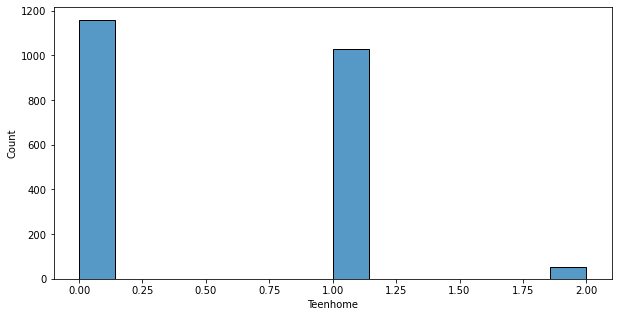

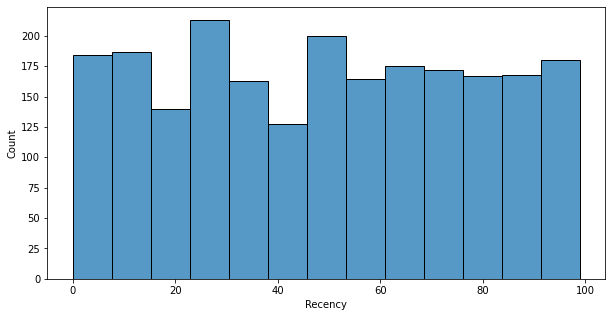

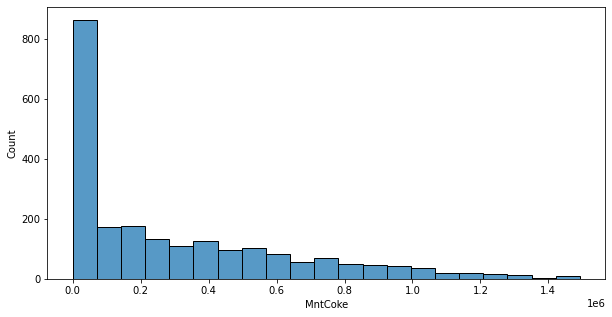

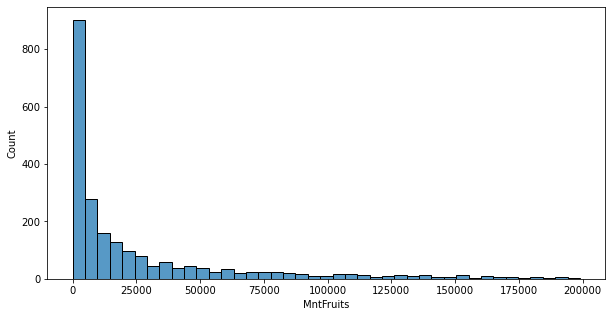

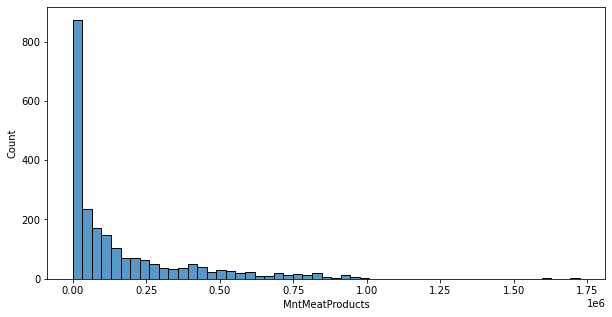

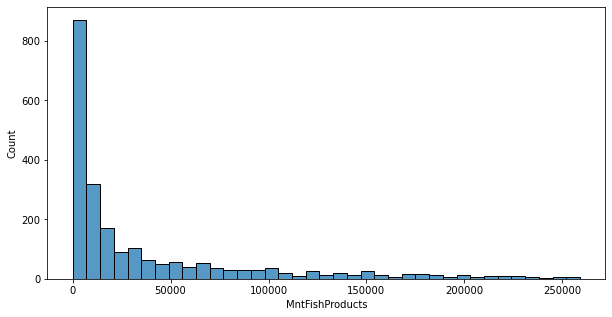

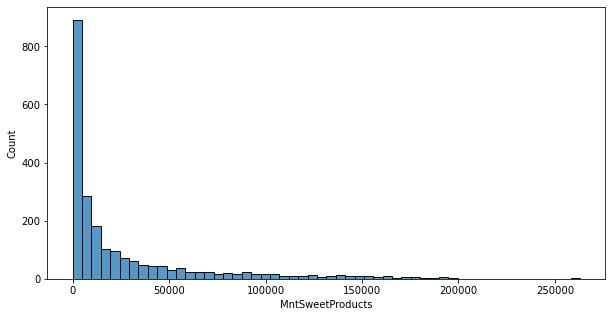

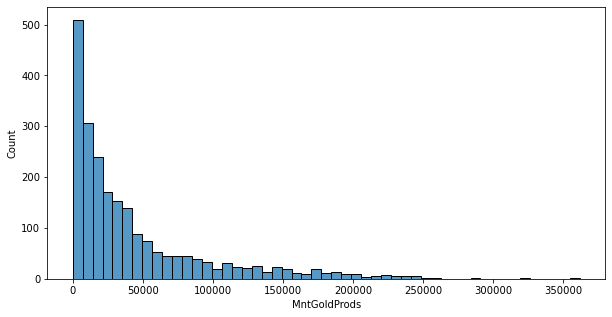

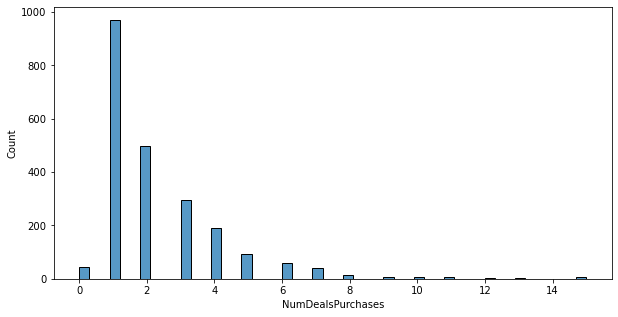

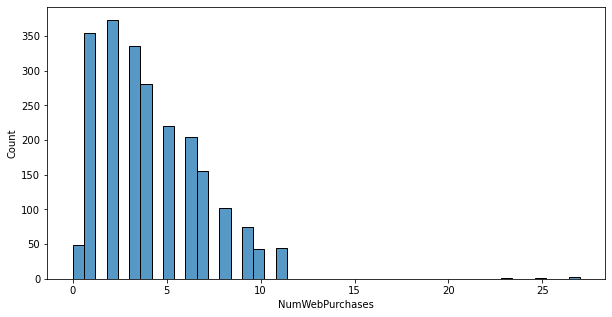

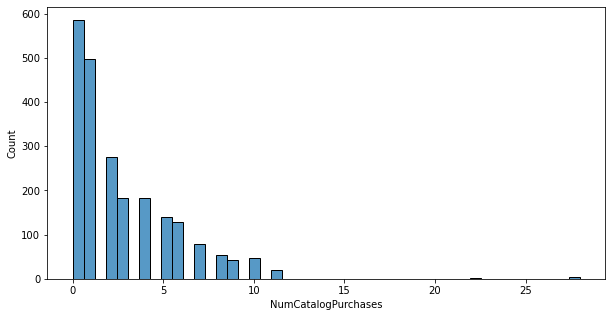

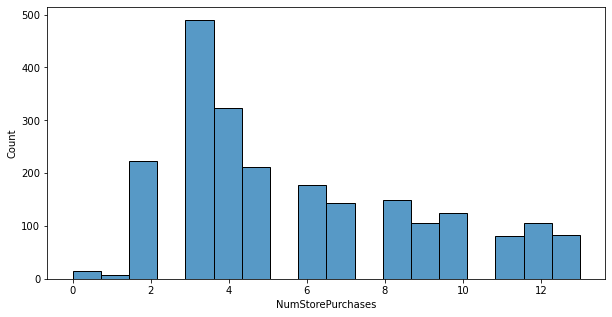

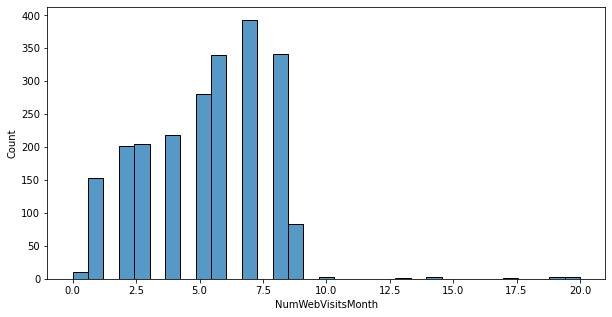

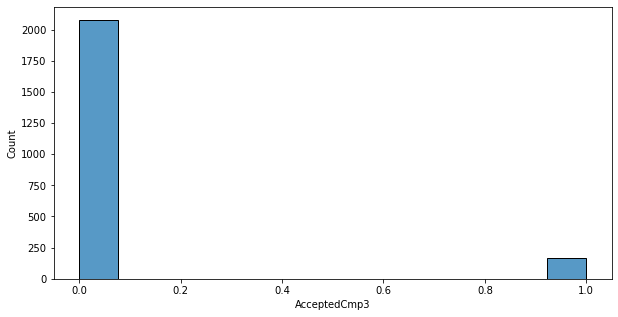

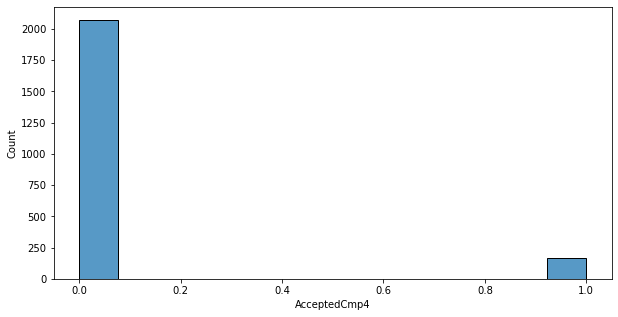

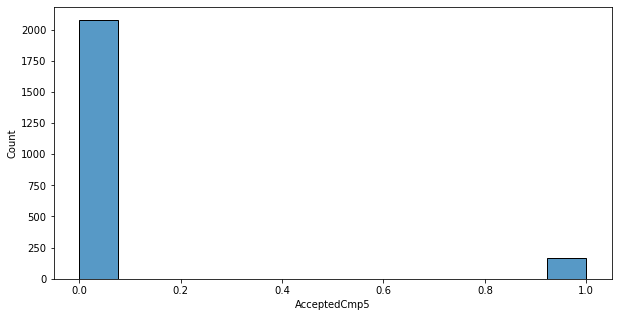

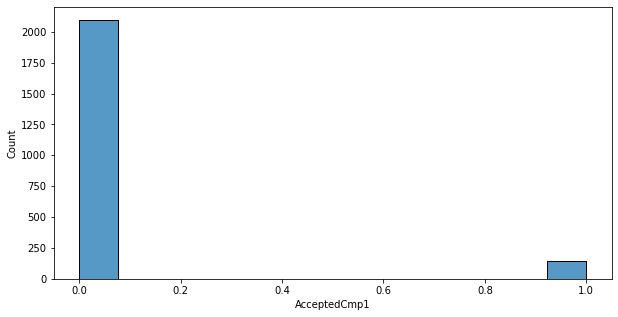

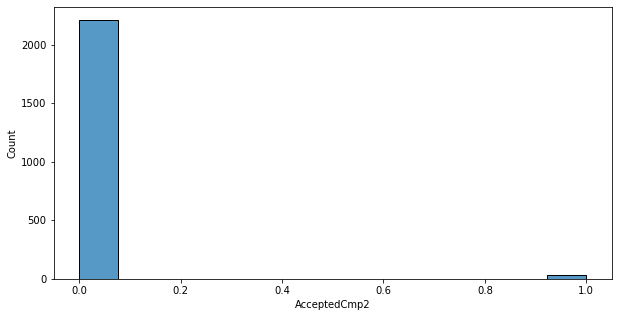

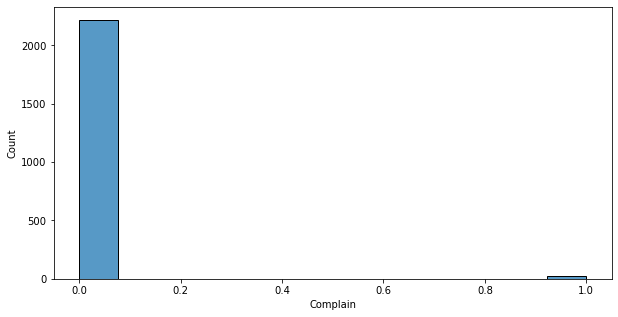

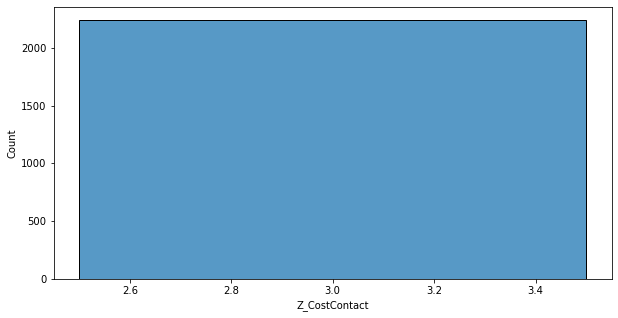

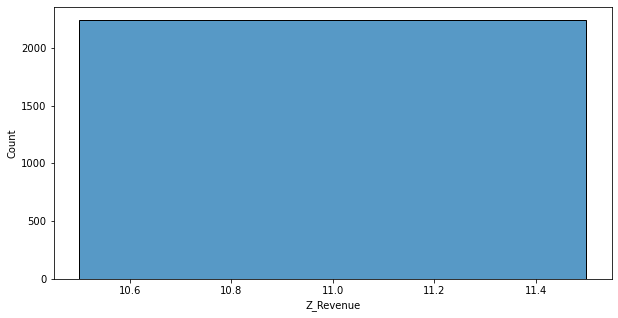

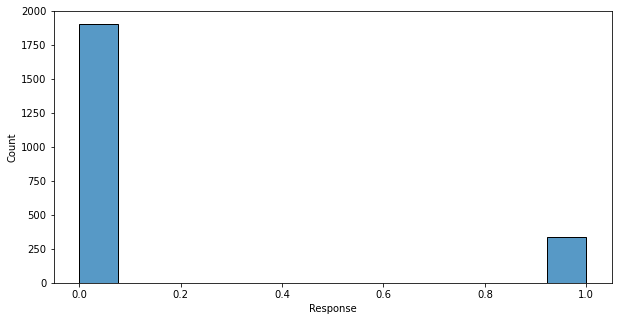

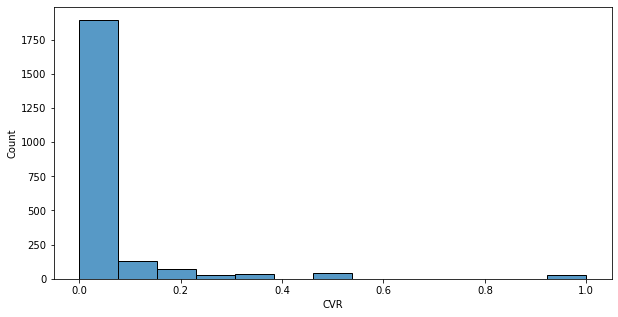

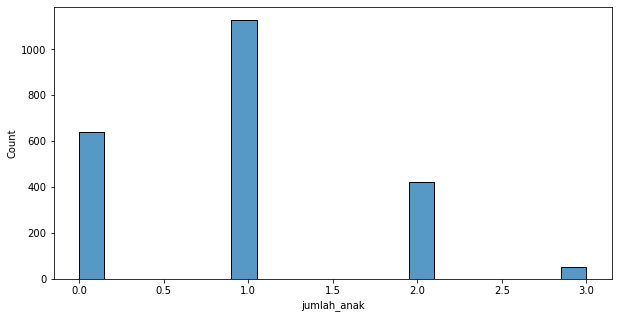

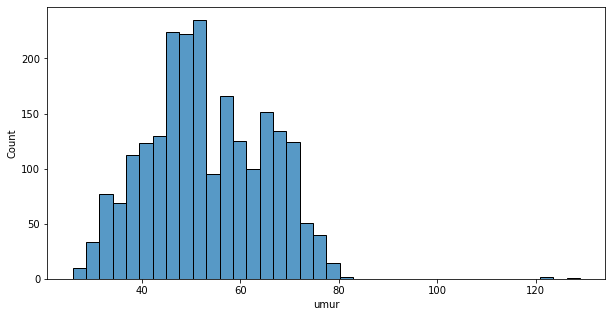

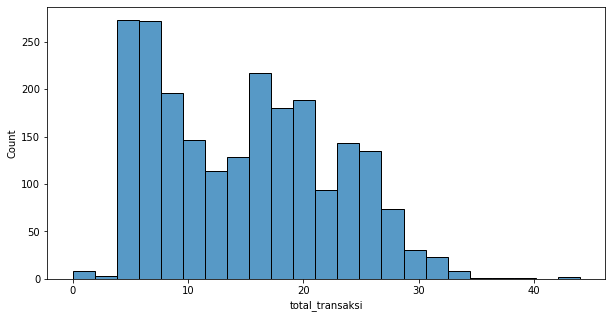

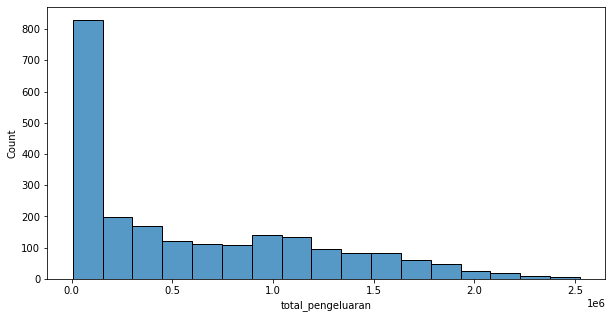

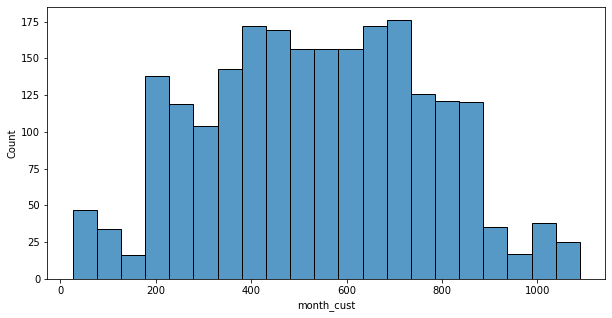

In [28]:
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.histplot(data=df,x=num)

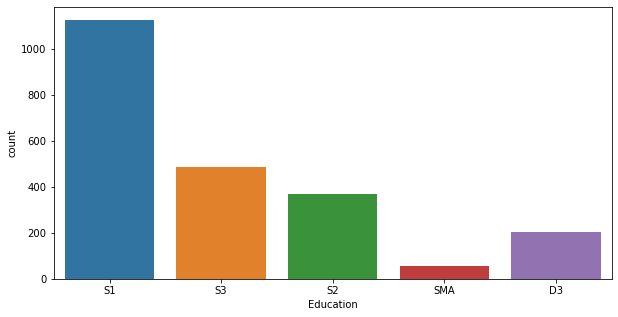

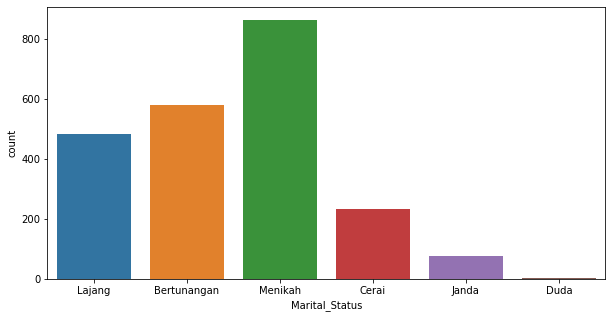

In [29]:
for j in range (0,len(categorical)):
    cat = categorical[j]
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=cat)

## Bivariate Analysis

### Total Transaksi

In [30]:
df[df['total_transaksi']> np.percentile(df['total_transaksi'],50)]['total_transaksi_bins'] = 1

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\1552214098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['total_transaksi']> np.percentile(df['total_transaksi'],50)]['total_transaksi_bins'] = 1


In [31]:
list_segment = [] #membuat list kosong
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['total_transaksi'] >= np.percentile(df['total_transaksi'],50):
        segment = 1
    else:
        segment = 0
    list_segment.append(segment) #menambahkan list kosong dari item tiap row
    
df['total_transaksi_bins'] = list_segment

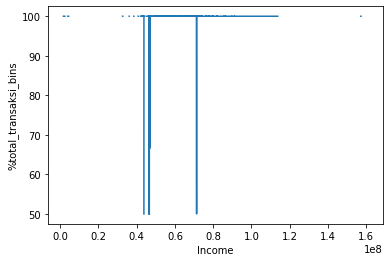

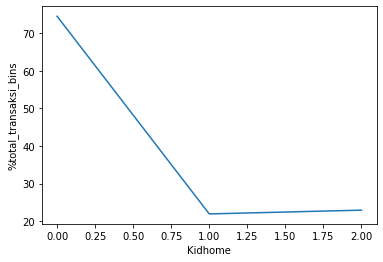

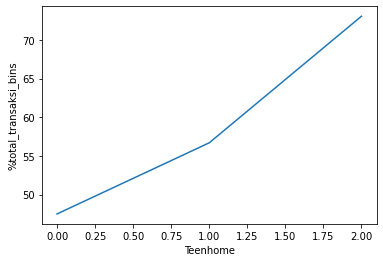

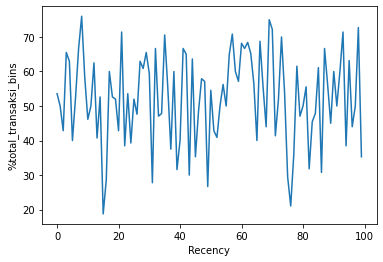

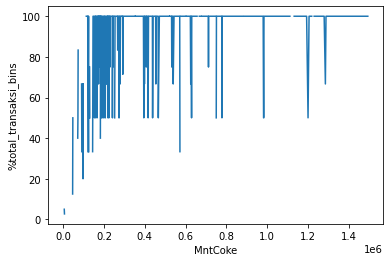

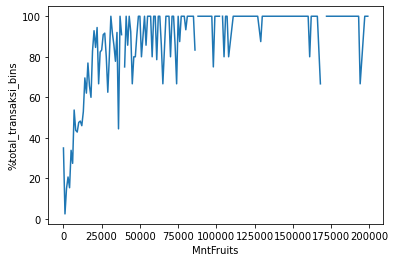

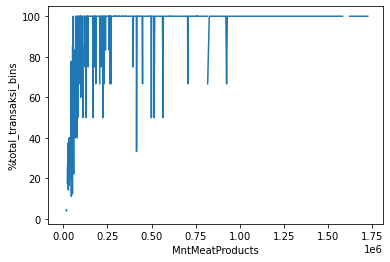

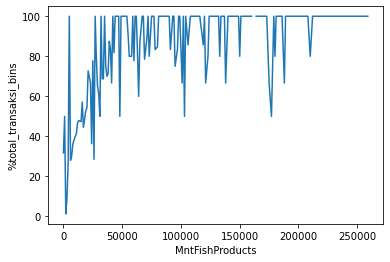

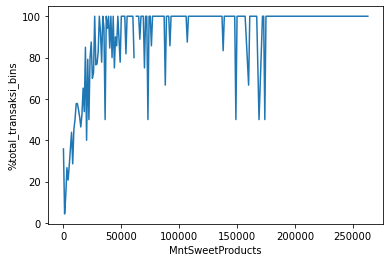

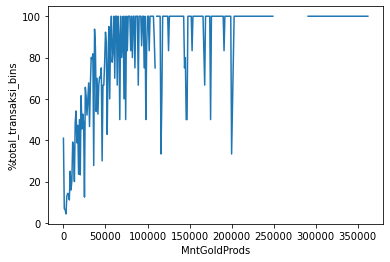

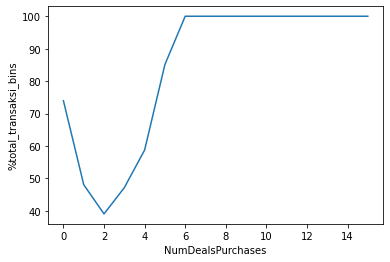

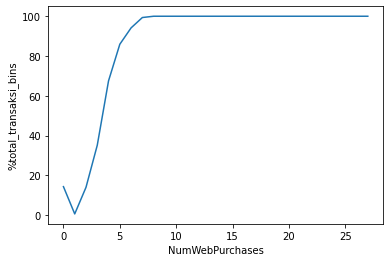

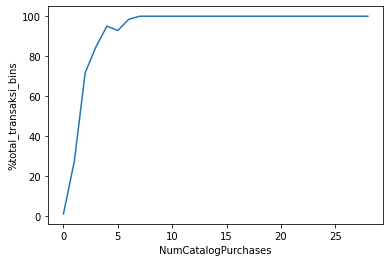

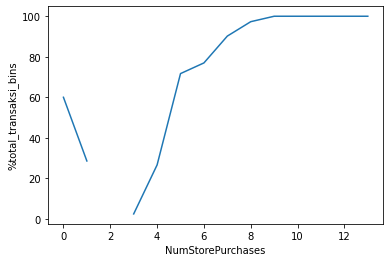

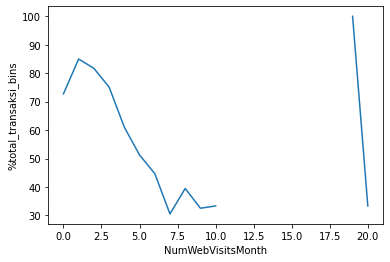

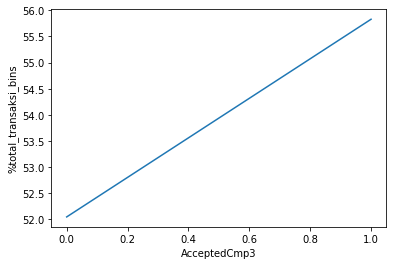

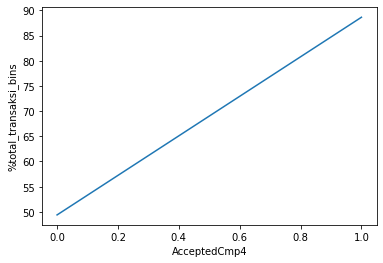

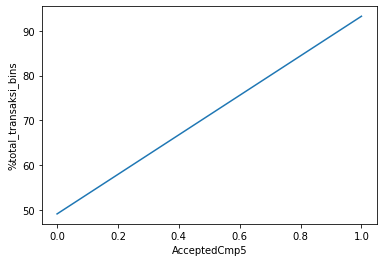

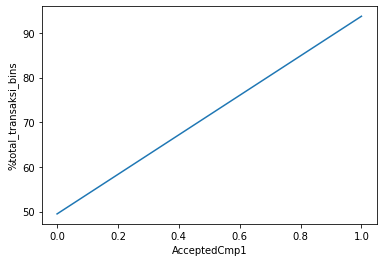

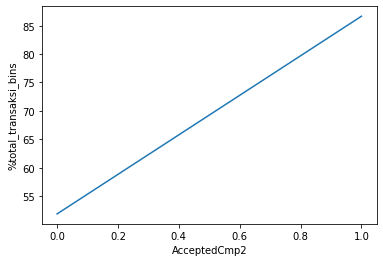

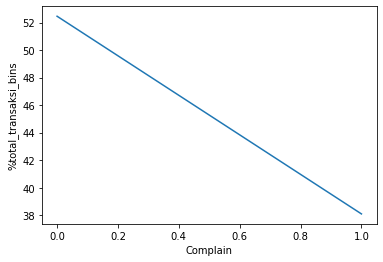

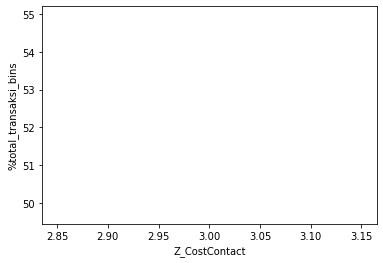

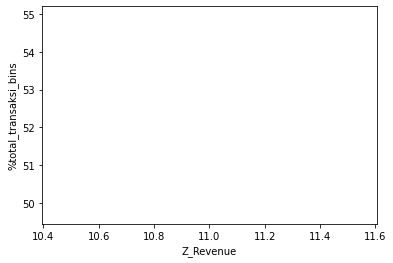

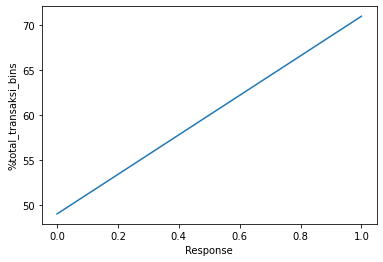

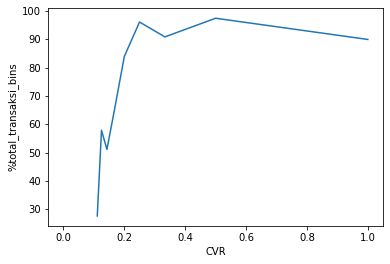

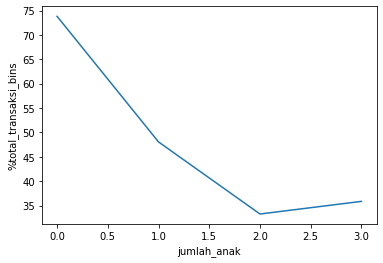

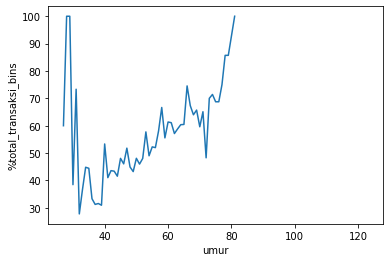

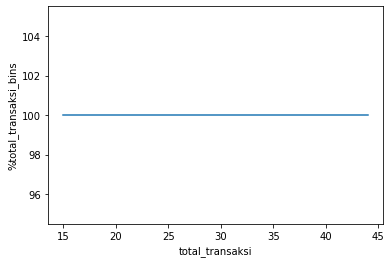

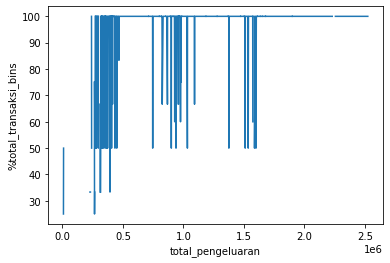

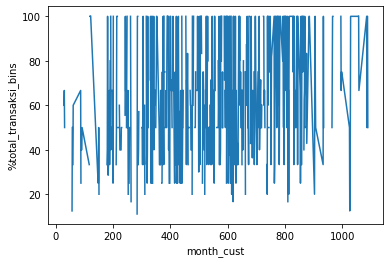

In [32]:
for j in range (0,len(numeric)):
    num = numeric[j]
    df['total_transaksi_bins_new'] = df['total_transaksi_bins']
    df_num = df.groupby([num])['total_transaksi_bins'].count()
    df_num = df_num.reset_index()
    df_num_corr = df[df['total_transaksi_bins']==1].groupby([num])['total_transaksi_bins_new'].count()
    df_num_corr = df_num_corr.reset_index()
    df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
    df_num_corr['%total_transaksi_bins'] = (df_num_corr['total_transaksi_bins_new']/df_num_corr['total_transaksi_bins'])*100
    plt.plot(df_num_corr[num],df_num_corr['%total_transaksi_bins'])
    plt.xlabel(num)
    plt.ylabel('%total_transaksi_bins')
    plt.show()

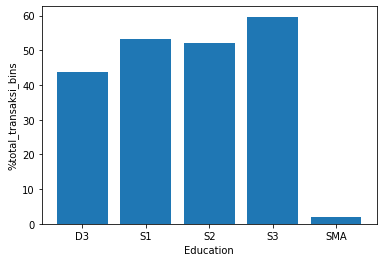

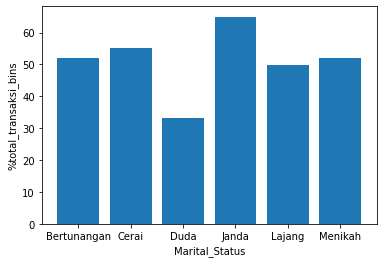

In [33]:
for j in range (0,len(categorical)):
    cat = categorical[j]
    df['total_transaksi_bins_new'] = df['total_transaksi_bins']
    df_cat = df.groupby([cat])['total_transaksi_bins'].count()
    df_cat = df_cat.reset_index()
    df_cat_corr = df[df['total_transaksi_bins']==1].groupby([cat])['total_transaksi_bins_new'].count()
    df_cat_corr = df_cat_corr.reset_index()
    df_cat_corr = df_cat.merge(df_cat_corr,how='left',on=cat)
    df_cat_corr['%total_transaksi_bins'] = (df_cat_corr['total_transaksi_bins_new']/df_cat_corr['total_transaksi_bins'])*100
    plt.bar(df_cat_corr[cat],df_cat_corr['%total_transaksi_bins'])
    plt.xlabel(cat)
    plt.ylabel('%total_transaksi_bins')
    plt.show()


### Total Pengeluaran

In [34]:
list_segment = [] #membuat list kosong
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['total_pengeluaran'] >= np.percentile(df['total_pengeluaran'],50):
        segment = 1
    else:
        segment = 0
    list_segment.append(segment) #menambahkan list kosong dari item tiap row
    
df['total_pengeluaran_bins'] = list_segment

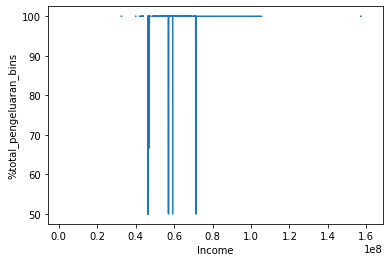

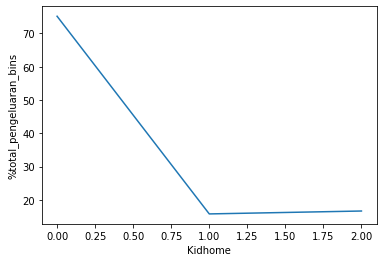

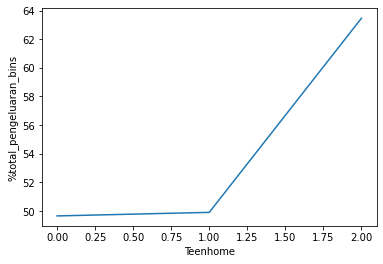

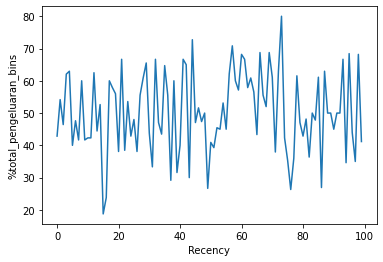

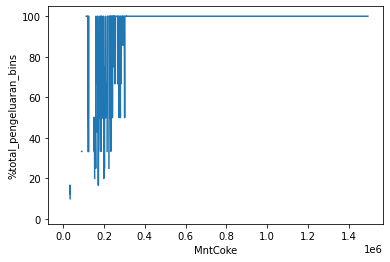

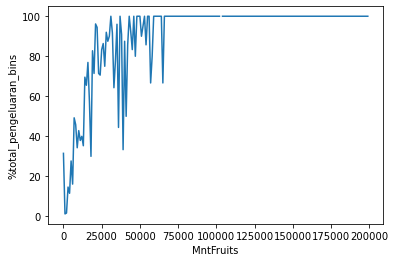

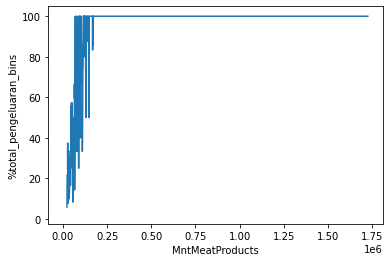

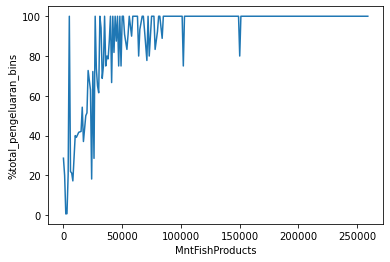

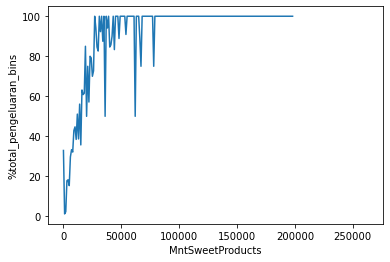

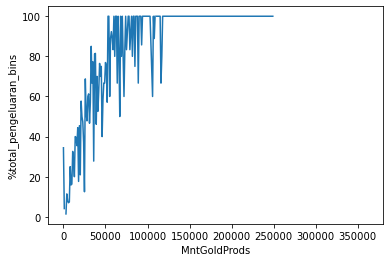

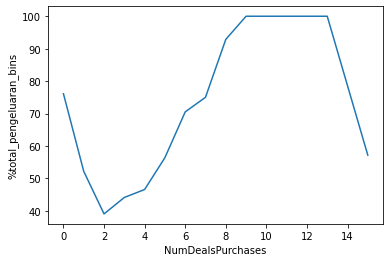

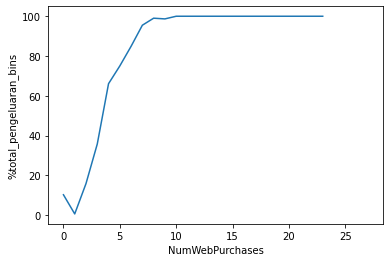

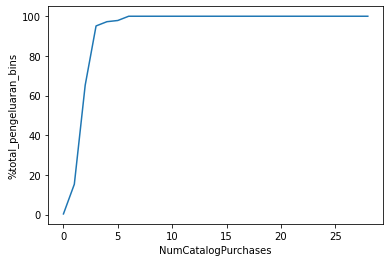

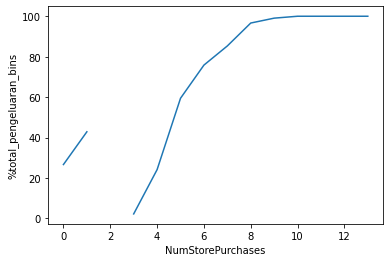

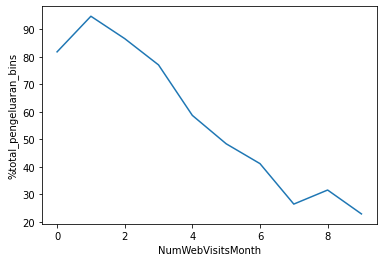

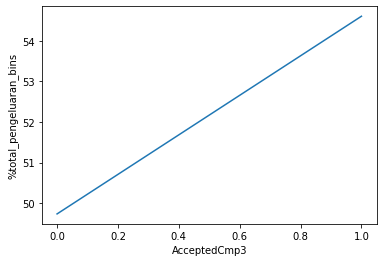

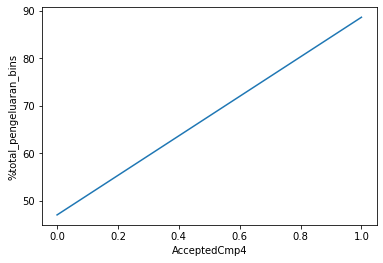

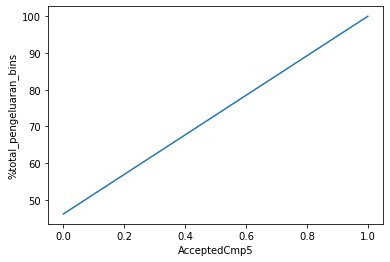

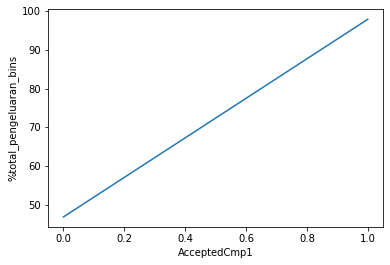

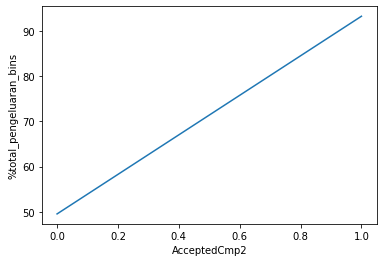

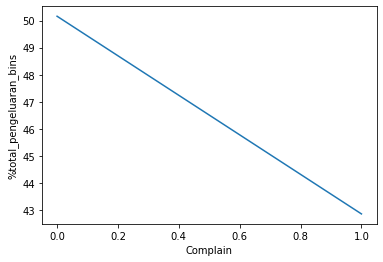

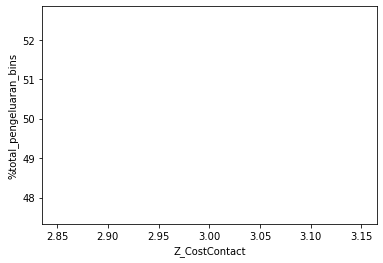

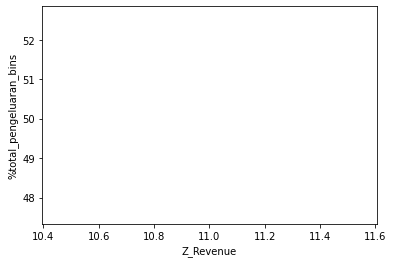

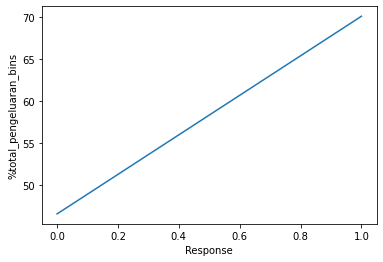

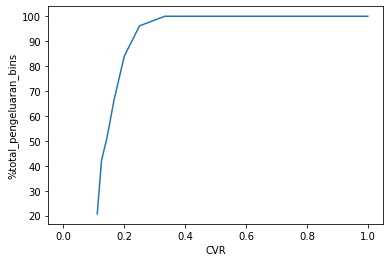

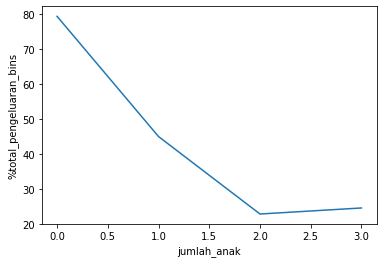

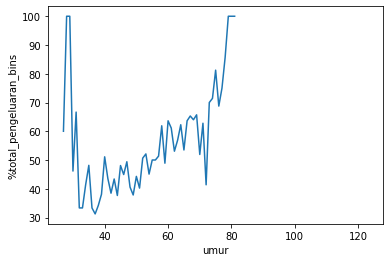

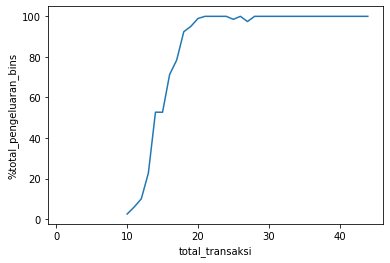

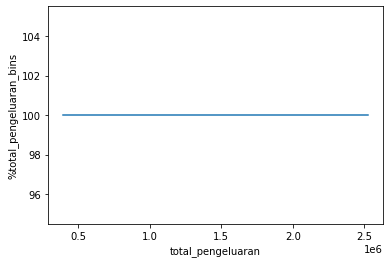

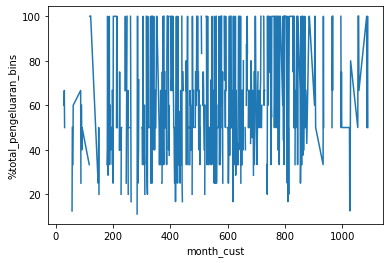

In [35]:
for j in range (0,len(numeric)):
    num = numeric[j]
    df['total_pengeluaran_bins_new'] = df['total_pengeluaran_bins']
    df_num = df.groupby([num])['total_pengeluaran_bins'].count()
    df_num = df_num.reset_index()
    df_num_corr = df[df['total_pengeluaran_bins']==1].groupby([num])['total_pengeluaran_bins_new'].count()
    df_num_corr = df_num_corr.reset_index()
    df_num_corr = df_num.merge(df_num_corr,how='left',on=num)
    df_num_corr['%total_pengeluaran_bins'] = (df_num_corr['total_pengeluaran_bins_new']/df_num_corr['total_pengeluaran_bins'])*100
    plt.plot(df_num_corr[num],df_num_corr['%total_pengeluaran_bins'])
    plt.xlabel(num)
    plt.ylabel('%total_pengeluaran_bins')
    plt.show()

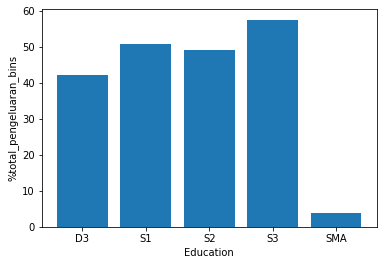

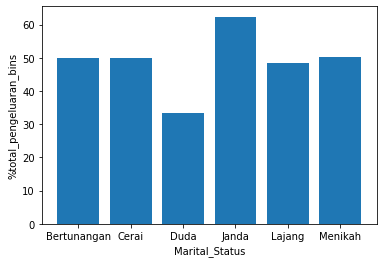

In [36]:
for j in range (0,len(categorical)):
    cat = categorical[j]
    df['total_pengeluaran_bins_new'] = df['total_pengeluaran_bins']
    df_cat = df.groupby([cat])['total_pengeluaran_bins'].count()
    df_cat = df_cat.reset_index()
    df_cat_corr = df[df['total_pengeluaran_bins']==1].groupby([cat])['total_pengeluaran_bins_new'].count()
    df_cat_corr = df_cat_corr.reset_index()
    df_cat_corr = df_cat.merge(df_cat_corr,how='left',on=cat)
    df_cat_corr['%total_pengeluaran_bins'] = (df_cat_corr['total_pengeluaran_bins_new']/df_cat_corr['total_pengeluaran_bins'])*100
    plt.bar(df_cat_corr[cat],df_cat_corr['%total_pengeluaran_bins'])
    plt.xlabel(cat)
    plt.ylabel('%total_pengeluaran_bins')
    plt.show()

## Multivariate Analysis

In [37]:
df.drop(['total_transaksi_bins','total_transaksi_bins_new','total_pengeluaran_bins','total_pengeluaran_bins_new'],axis=1,inplace=True)

<AxesSubplot:>

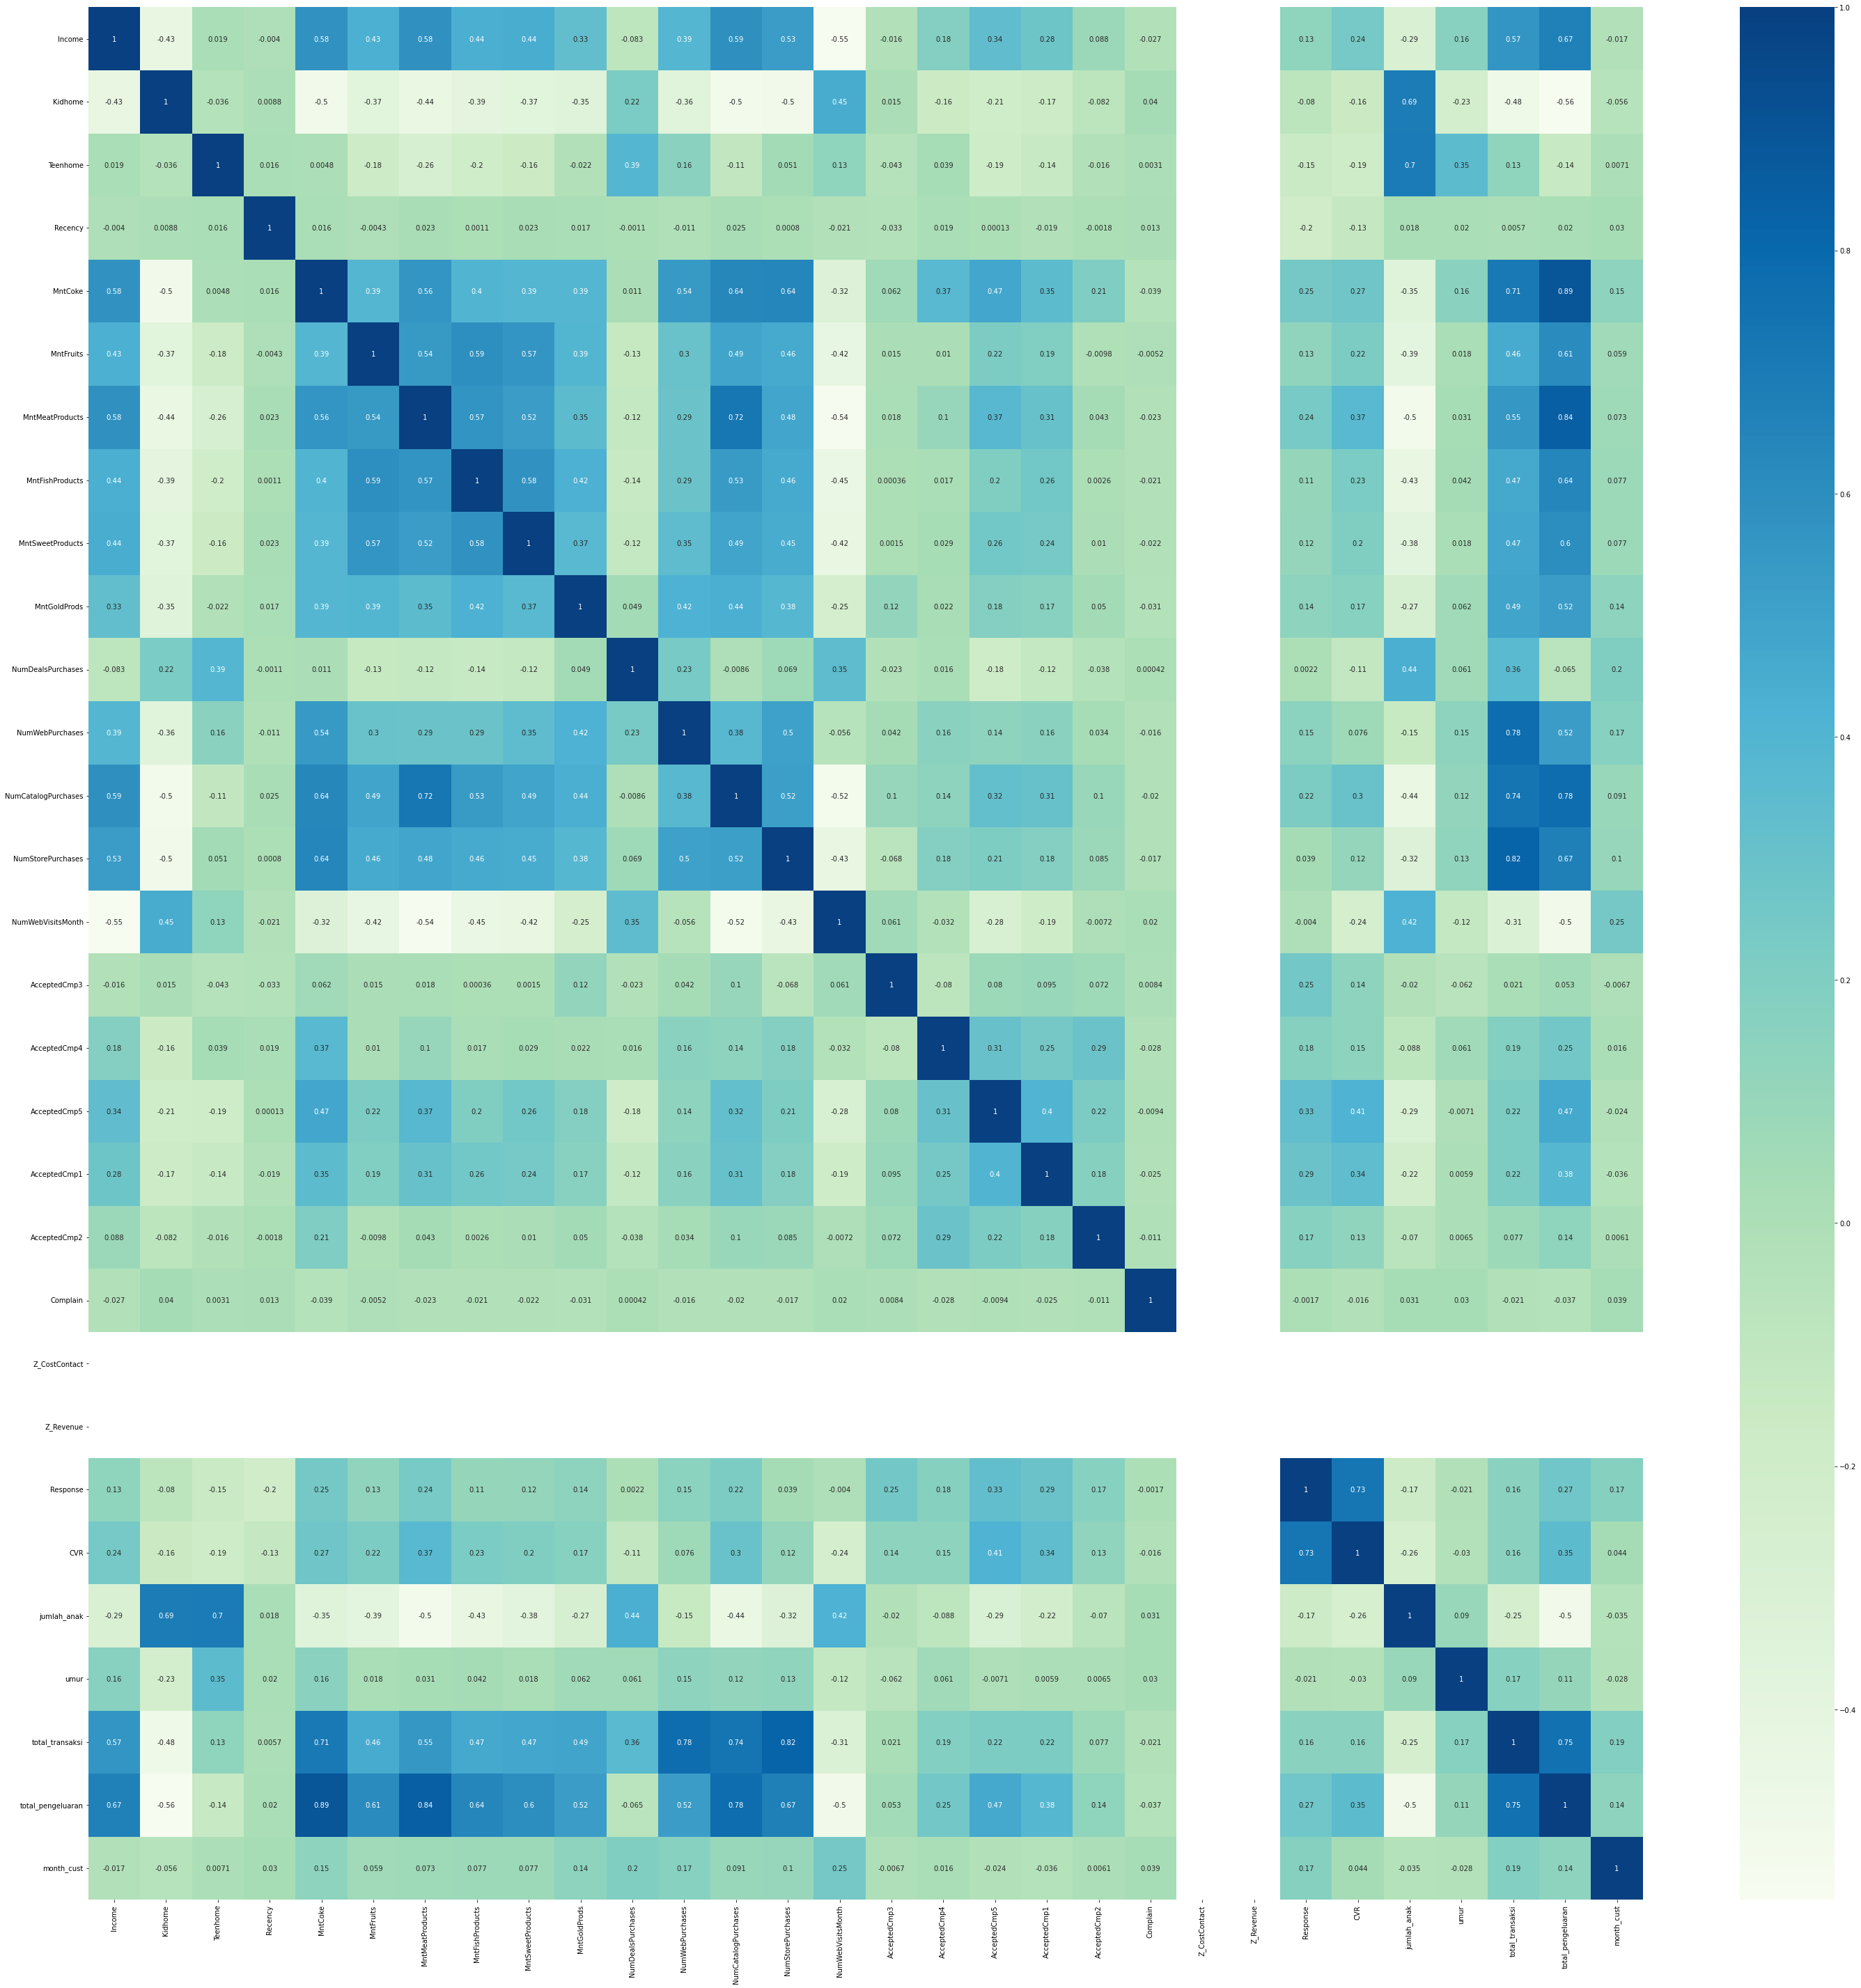

In [38]:
plt.figure(figsize = (50,50))
corr = numeric
df_corr = df[corr]
correlation = df_corr.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

In [39]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\2772442783.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [40]:
to_drop_hicorr

['NumCatalogPurchases', 'CVR', 'umur', 'total_transaksi', 'total_pengeluaran']

# Data Preprocessing

## Data Cleaning

In [41]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
CVR                    11
jumlah_anak             0
umur                    0
total_transaksi         0
total_pengeluaran       0
month_cust              0
dtype: int64

In [42]:
num_null = ['CVR','Income']

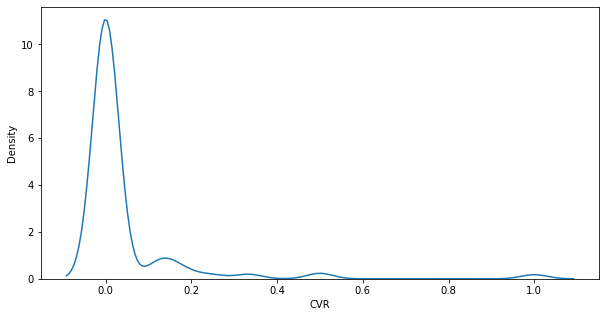

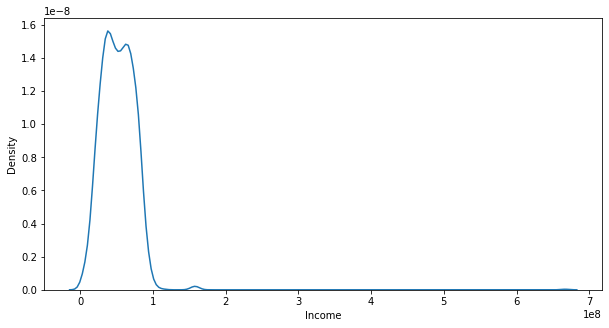

In [43]:
for j in range (0,len(num_null)):
    num = num_null[j]
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df,x=num)

In [44]:
df['CVR'] = df['CVR'].fillna(df['CVR'].median())

In [45]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [46]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
CVR                    0
jumlah_anak            0
umur                   0
total_transaksi        0
total_pengeluaran      0
month_cust             0
dtype: int64

In [47]:
df.drop(['ID','Year_Birth','Dt_Customer'],axis=1,inplace=True)

## Outlier

In [48]:
df.shape[0]

2240

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\1610865284.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


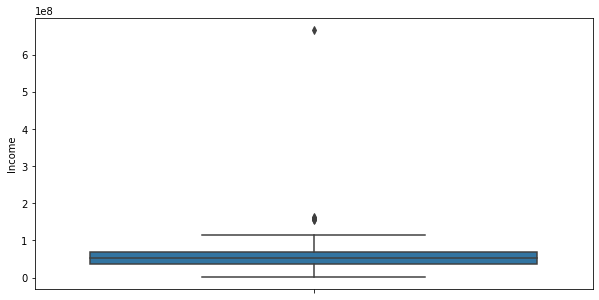

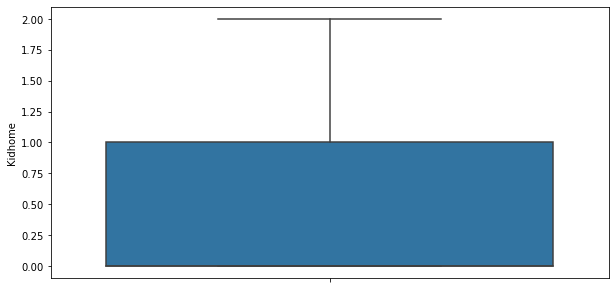

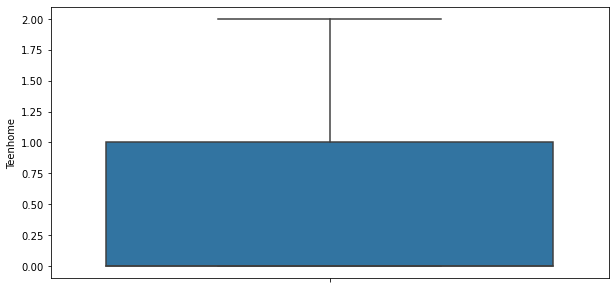

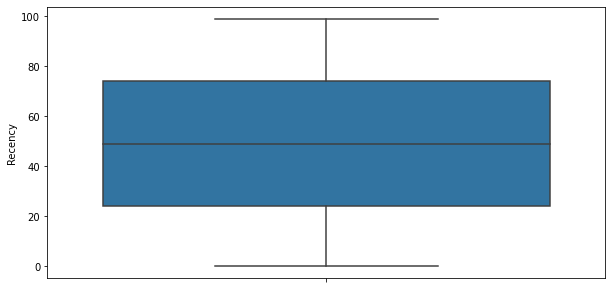

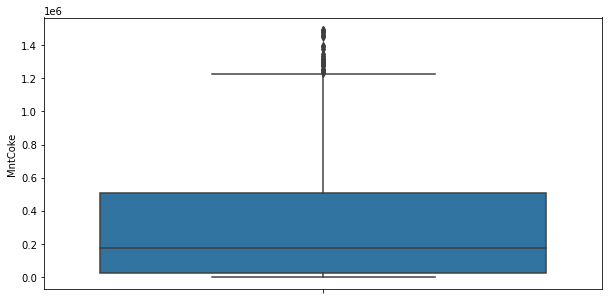

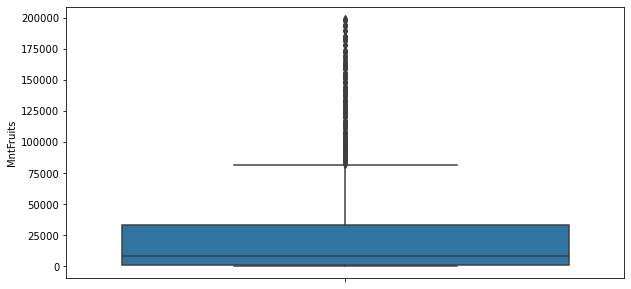

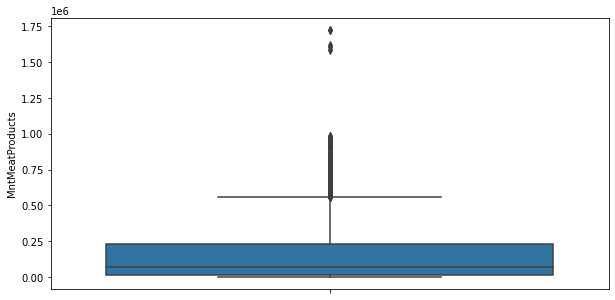

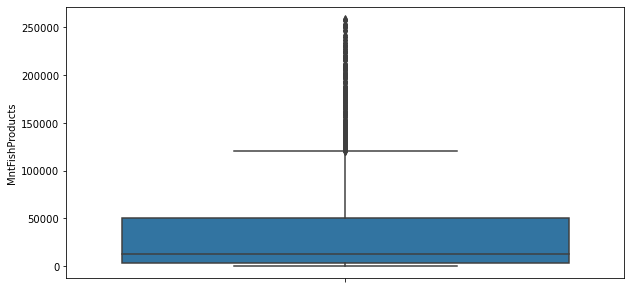

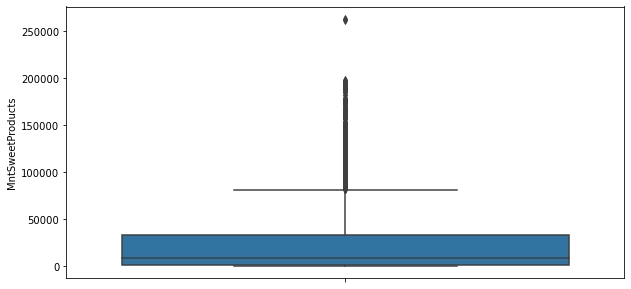

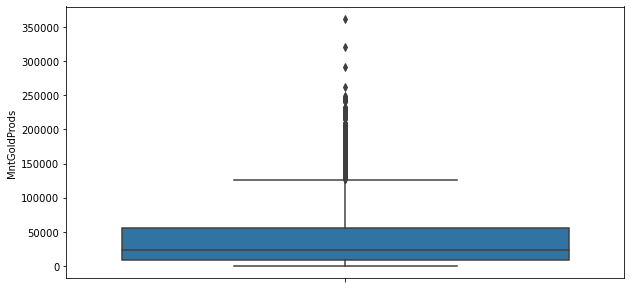

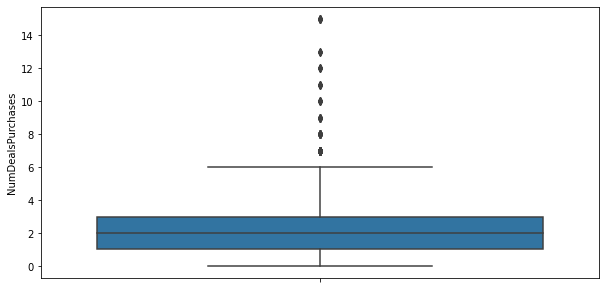

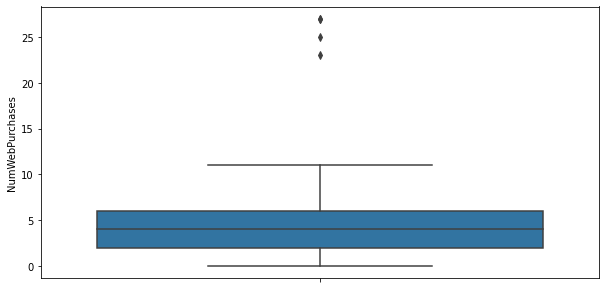

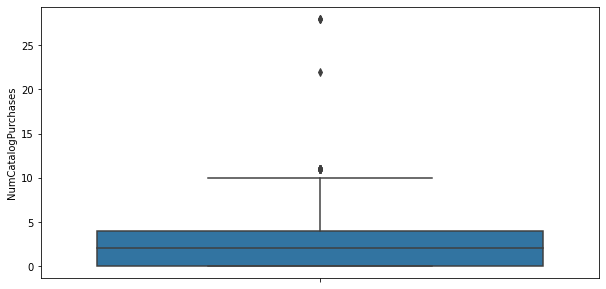

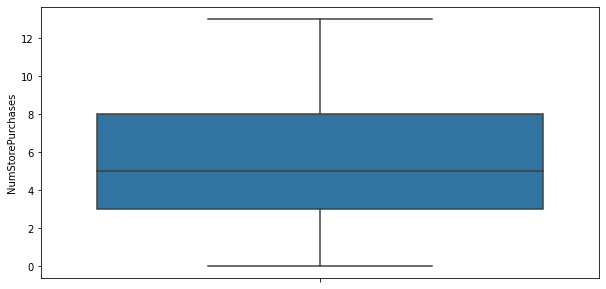

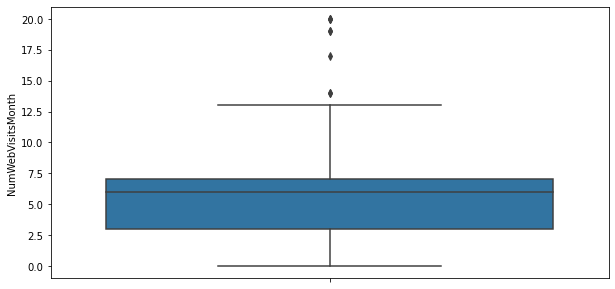

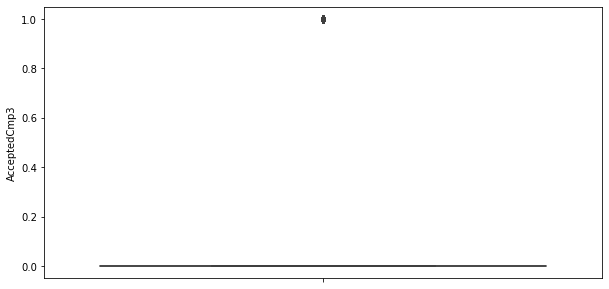

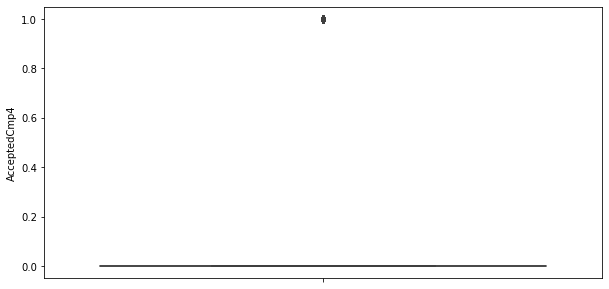

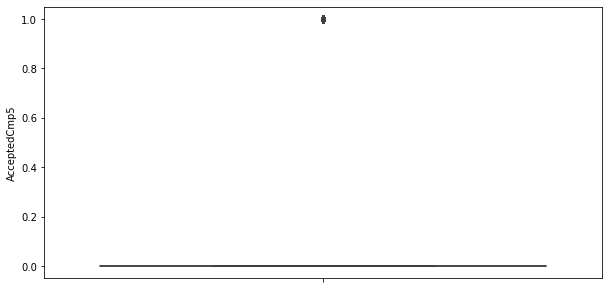

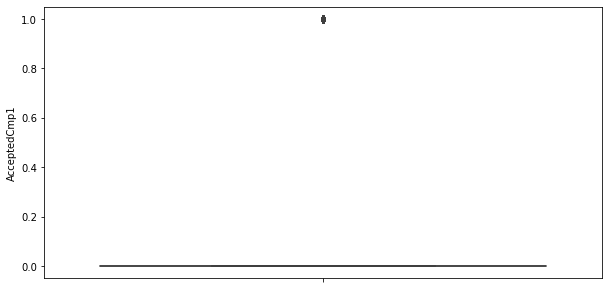

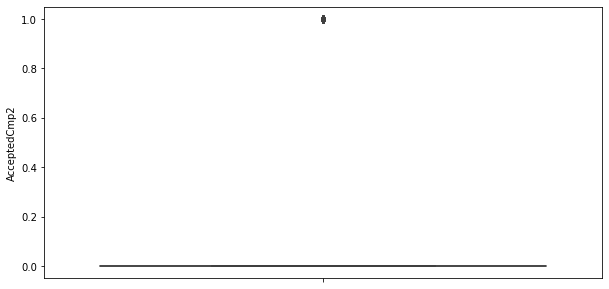

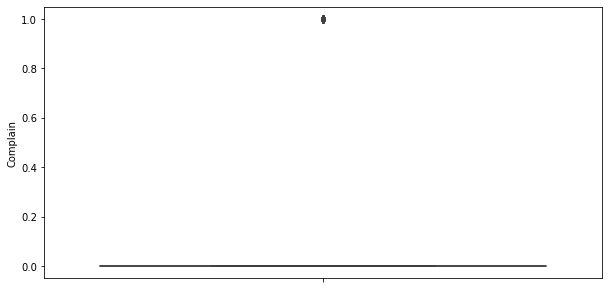

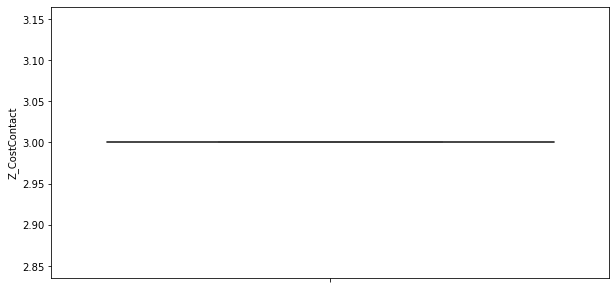

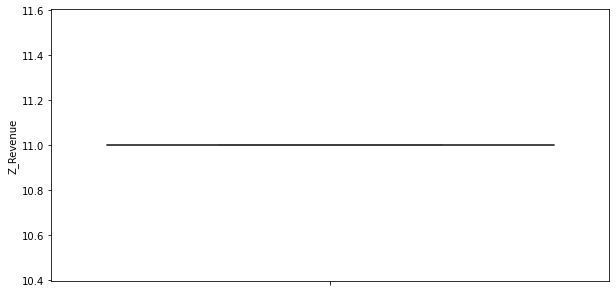

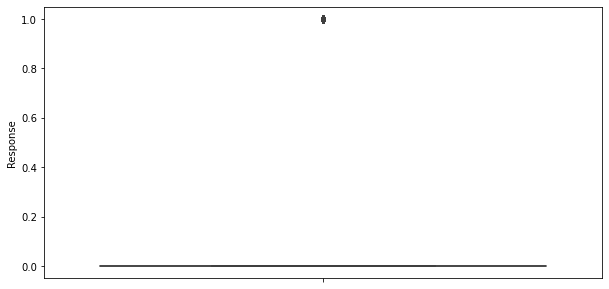

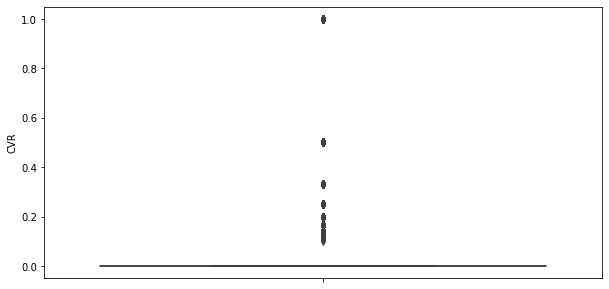

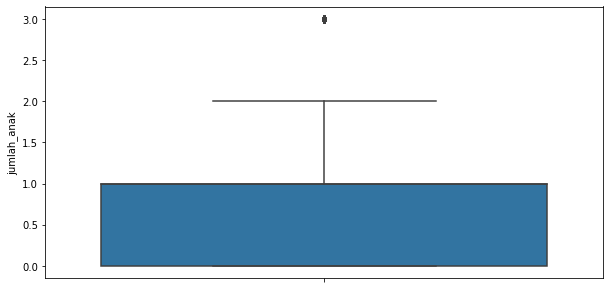

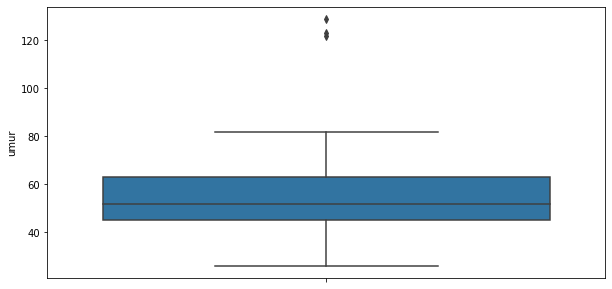

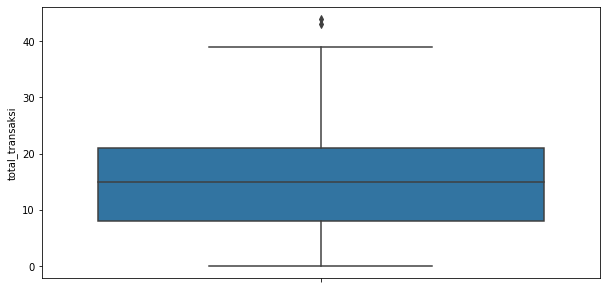

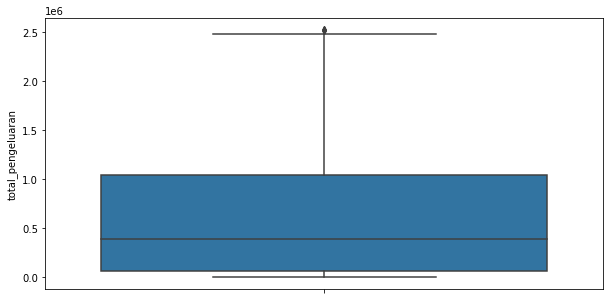

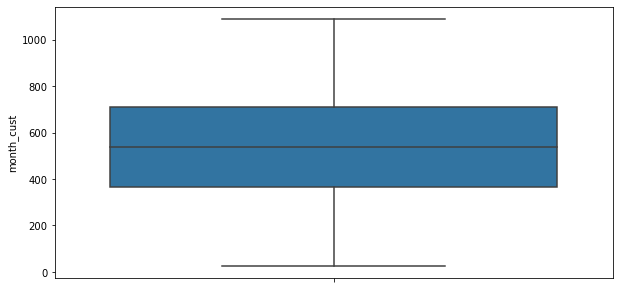

In [49]:
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,y=num)

In [50]:
df.drop(['Z_Revenue','Z_CostContact'],axis=1,inplace=True)

In [51]:
numeric.remove('Z_Revenue')

In [52]:
numeric.remove('Z_CostContact')

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\1610865284.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


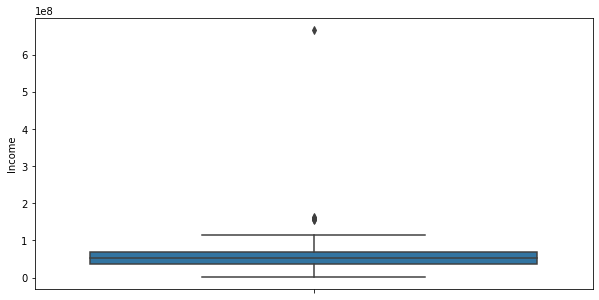

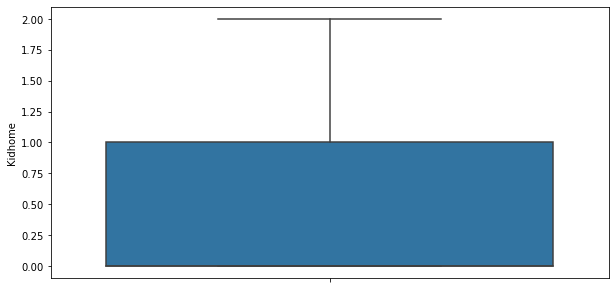

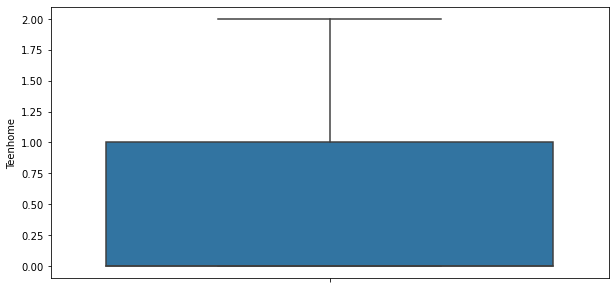

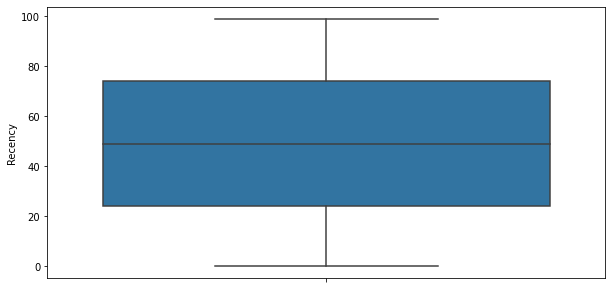

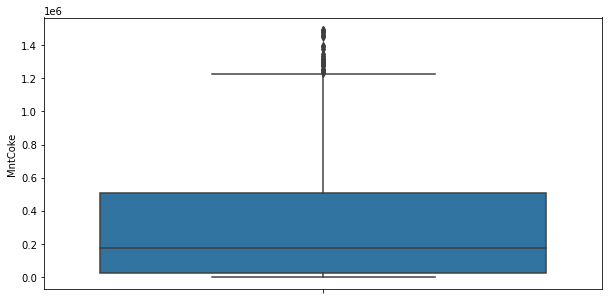

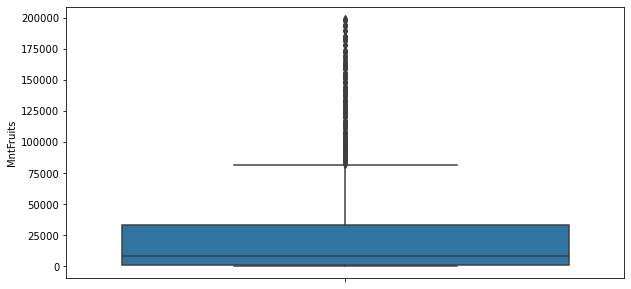

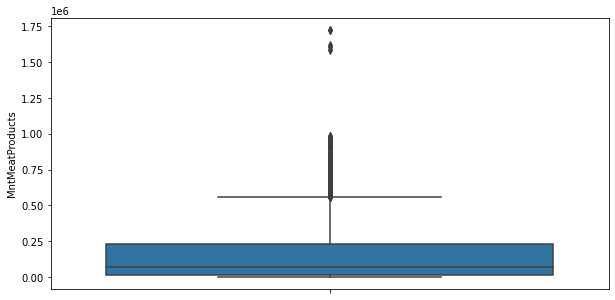

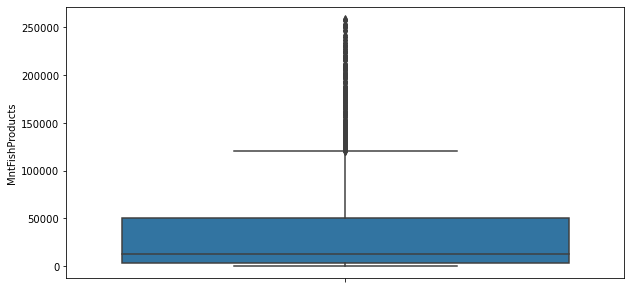

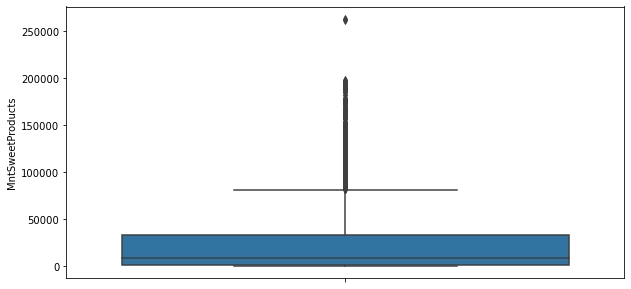

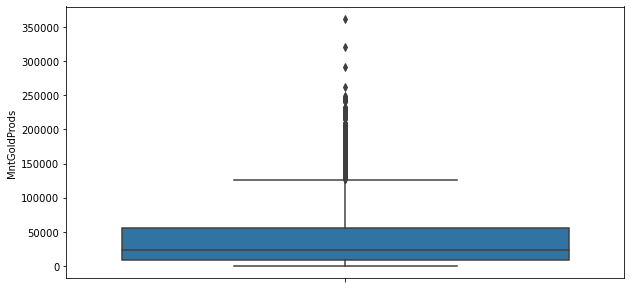

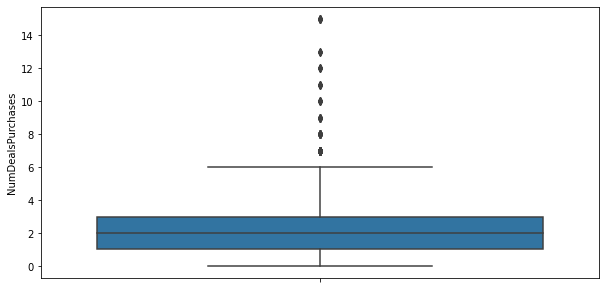

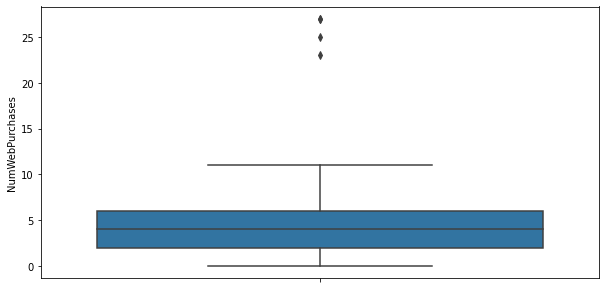

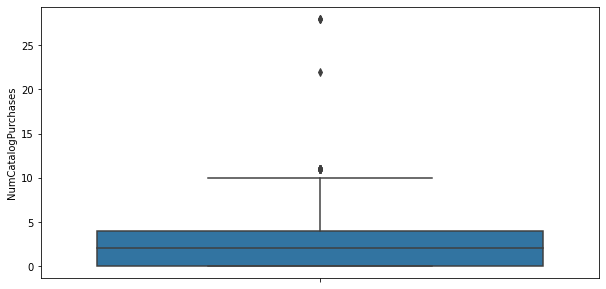

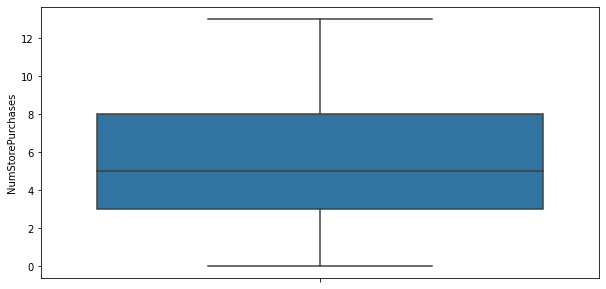

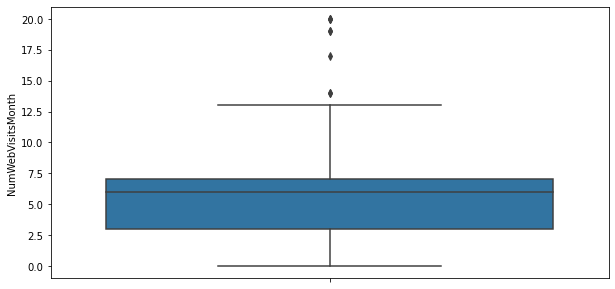

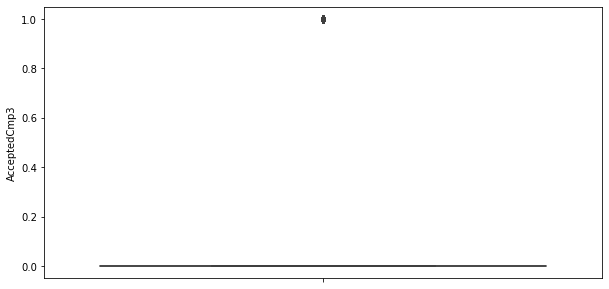

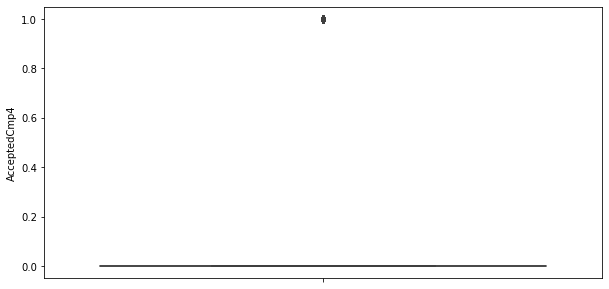

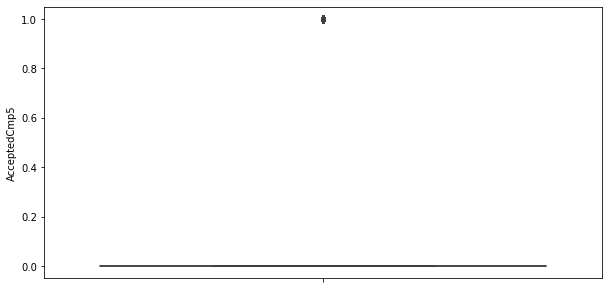

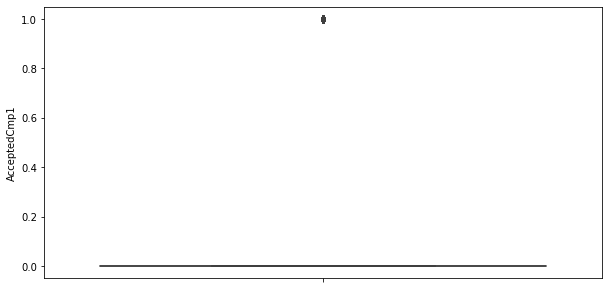

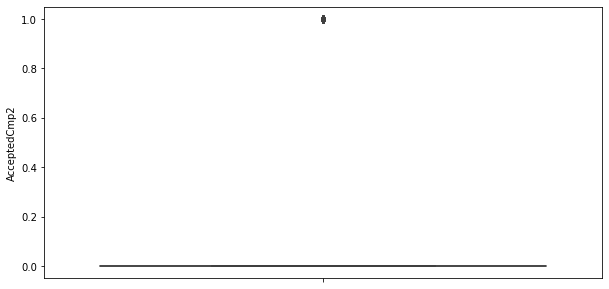

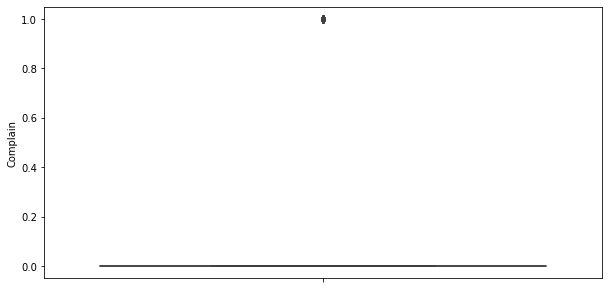

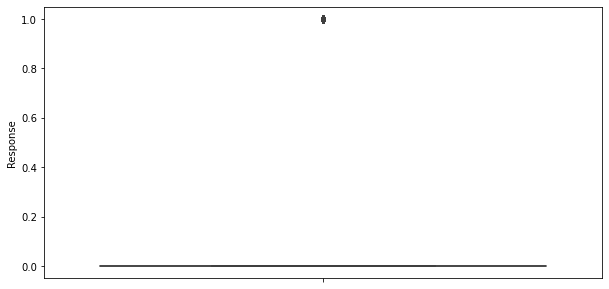

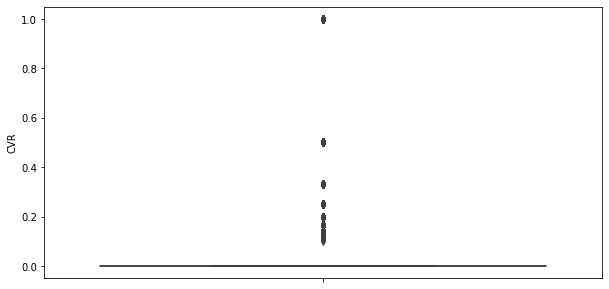

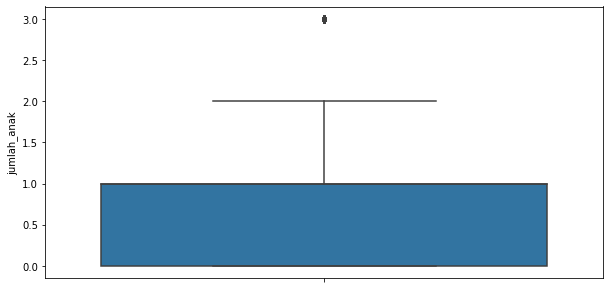

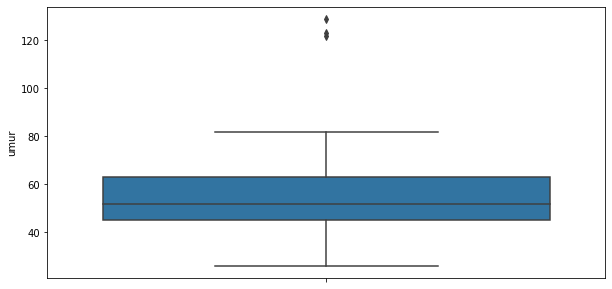

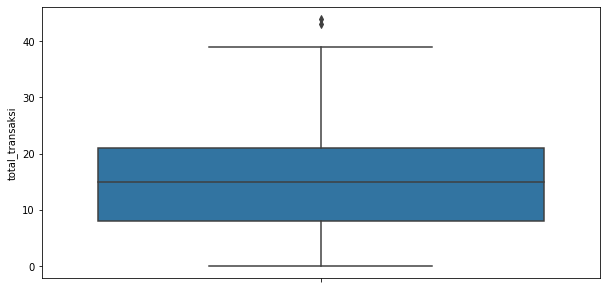

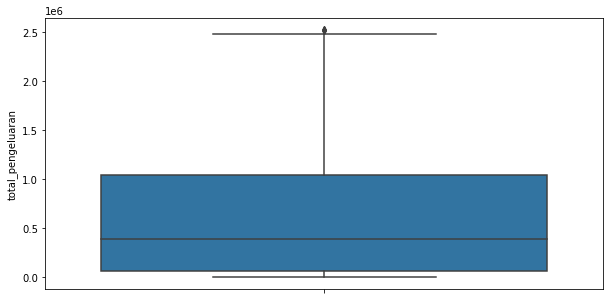

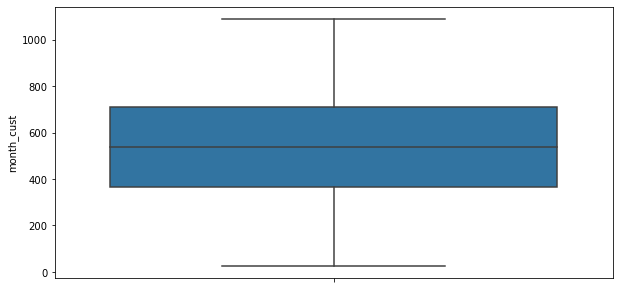

In [53]:
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,y=num)

In [70]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df['Income']>=low_limit)&(df['Income']<=high_limit))
df_clean_IQR = df
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

2232

In [71]:
Q1 = df_clean_IQR['jumlah_anak'].quantile(0.25)
Q3 = df_clean_IQR['jumlah_anak'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_clean_IQR['jumlah_anak']>=low_limit)&(df_clean_IQR['jumlah_anak']<=high_limit))
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

2179

In [72]:
Q1 = df_clean_IQR['umur'].quantile(0.25)
Q3 = df_clean_IQR['umur'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_clean_IQR['umur']>=low_limit)&(df_clean_IQR['umur']<=high_limit))
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

2176

In [73]:
Q1 = df_clean_IQR['total_transaksi'].quantile(0.25)
Q3 = df_clean_IQR['total_transaksi'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_clean_IQR['total_transaksi']>=low_limit)&(df_clean_IQR['total_transaksi']<=high_limit))
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

2175

In [74]:
Q1 = df_clean_IQR['total_pengeluaran'].quantile(0.25)
Q3 = df_clean_IQR['total_pengeluaran'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_clean_IQR['total_pengeluaran']>=low_limit)&(df_clean_IQR['total_pengeluaran']<=high_limit))
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

2175

In [99]:
Q1 = df_clean_IQR['NumWebVisitsMonth'].quantile(0.25)
Q3 = df_clean_IQR['NumWebVisitsMonth'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_clean_IQR['NumWebVisitsMonth']>=low_limit)&(df_clean_IQR['NumWebVisitsMonth']<=high_limit))
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

2167

In [101]:
Q1 = df_clean_IQR['NumCatalogPurchases'].quantile(0.25)
Q3 = df_clean_IQR['NumCatalogPurchases'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_clean_IQR['NumCatalogPurchases']>=low_limit)&(df_clean_IQR['NumCatalogPurchases']<=high_limit))
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

2148

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_14132\3548784554.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


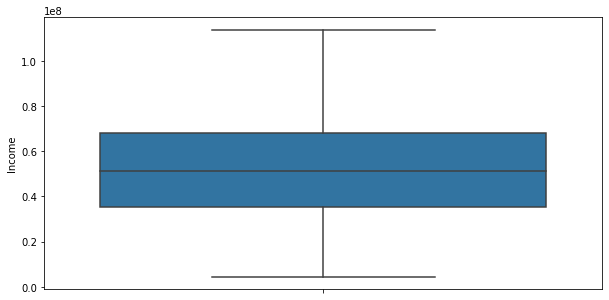

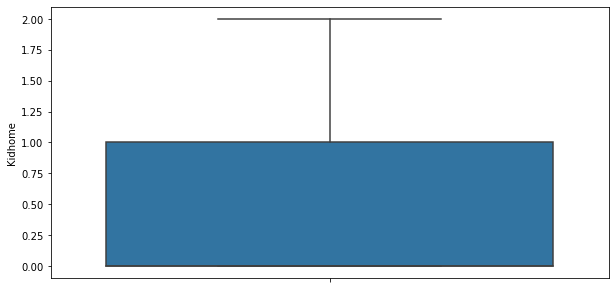

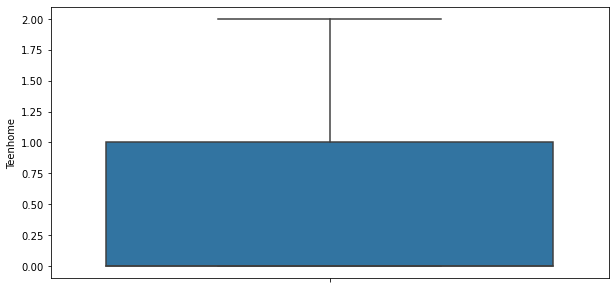

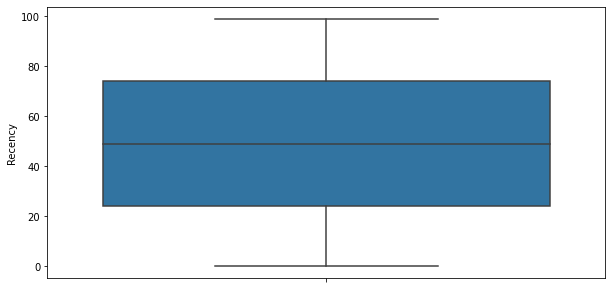

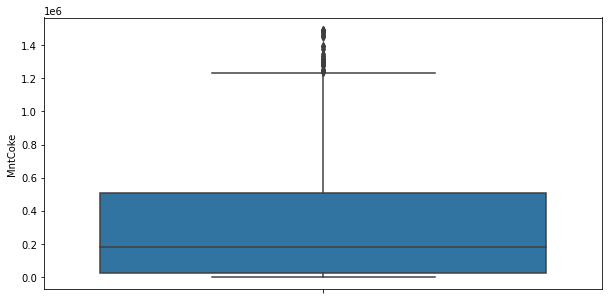

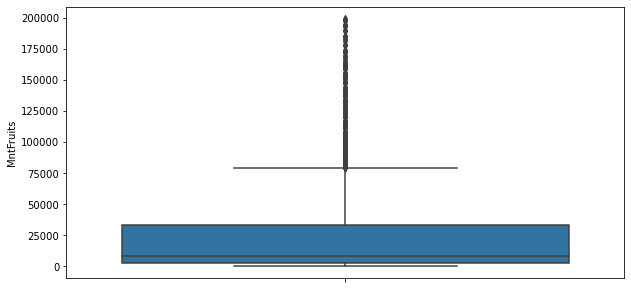

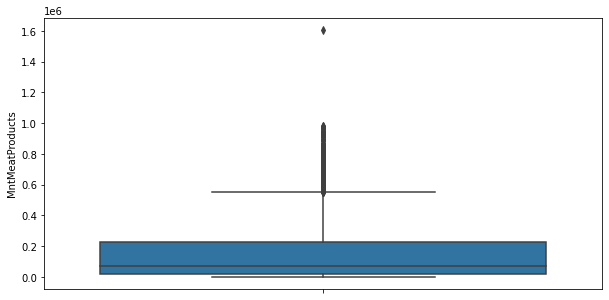

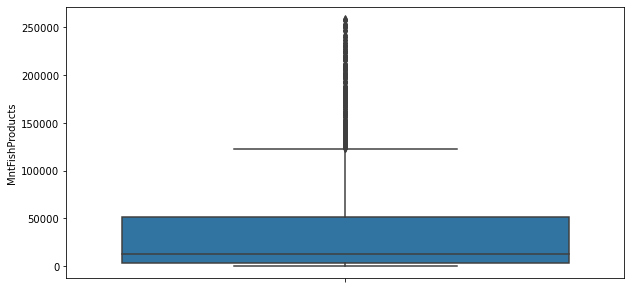

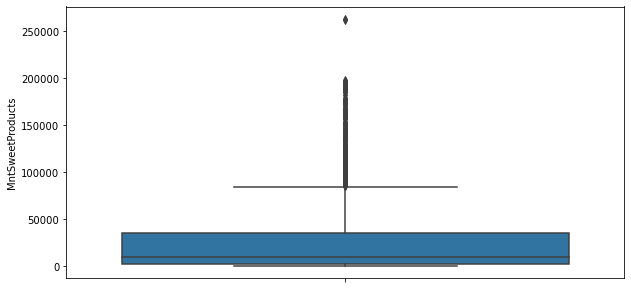

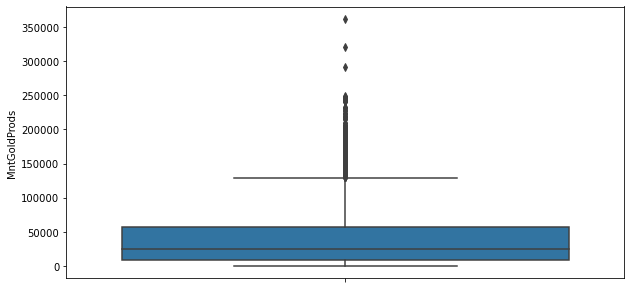

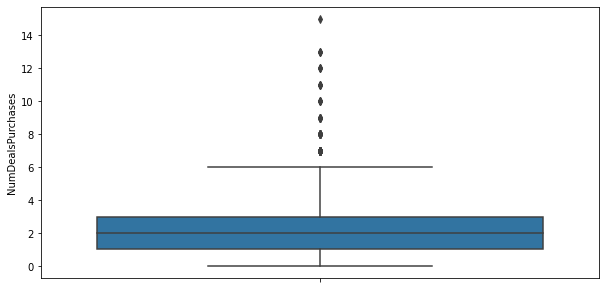

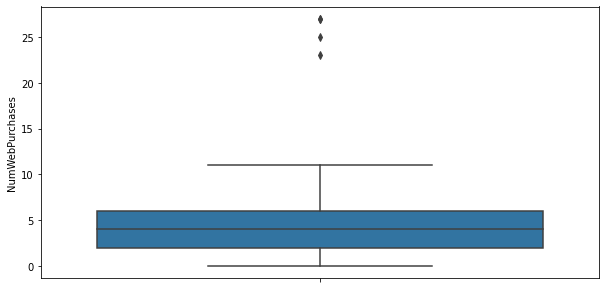

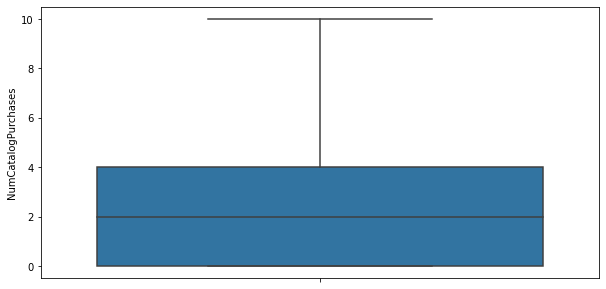

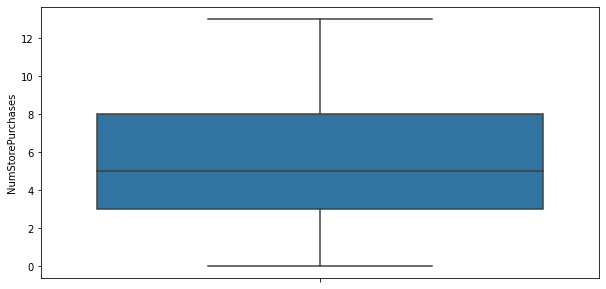

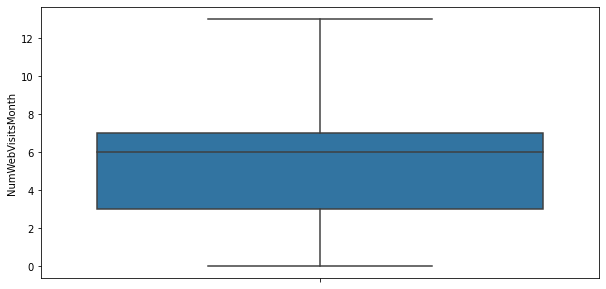

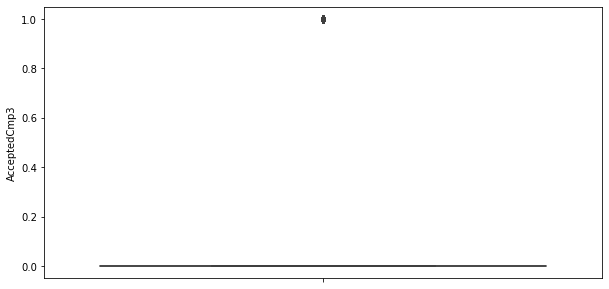

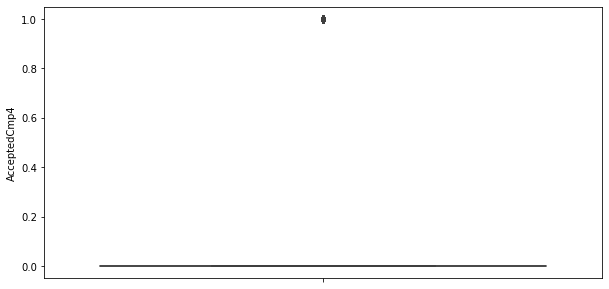

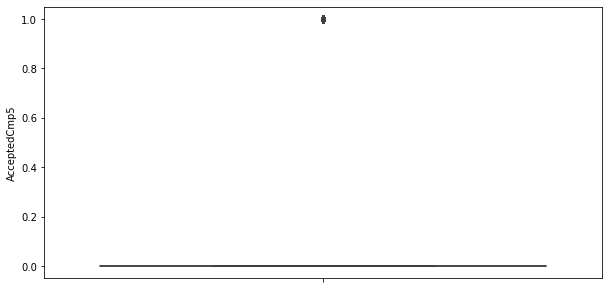

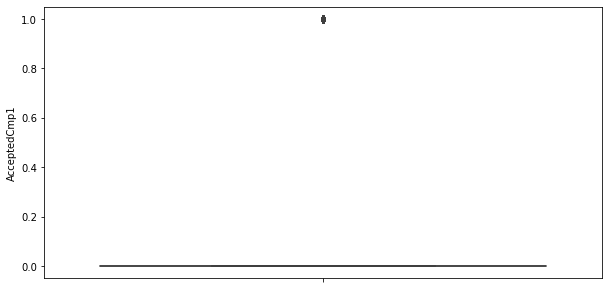

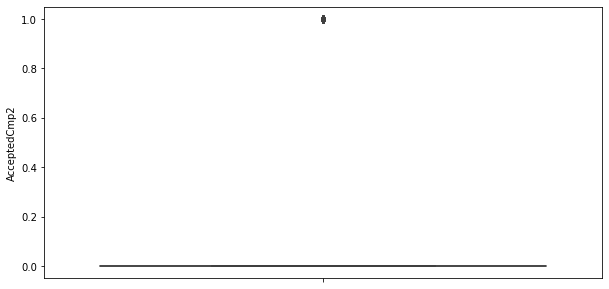

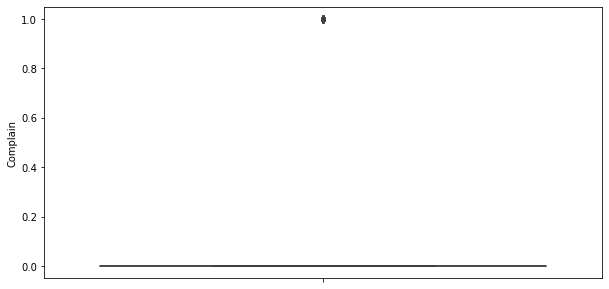

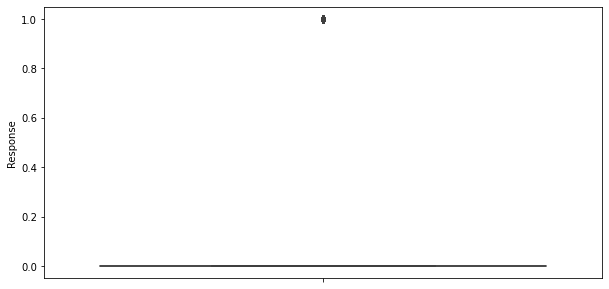

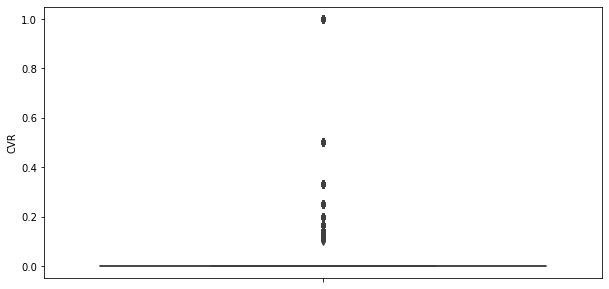

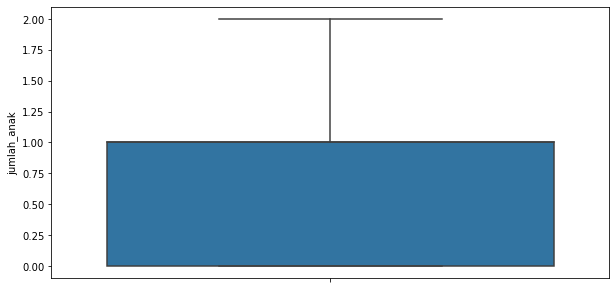

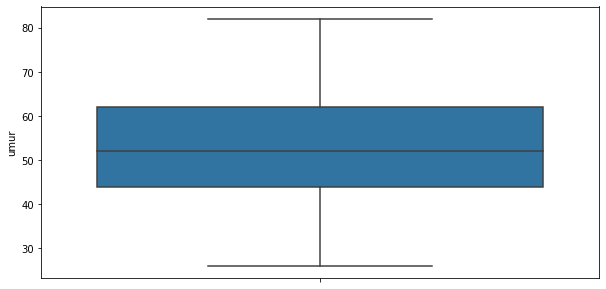

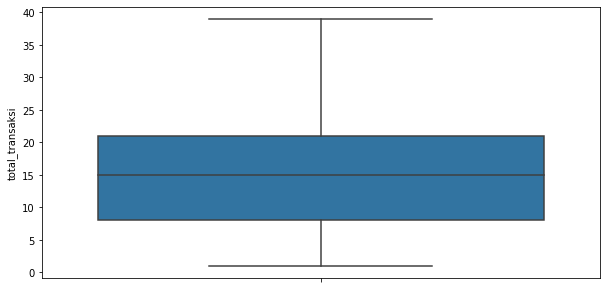

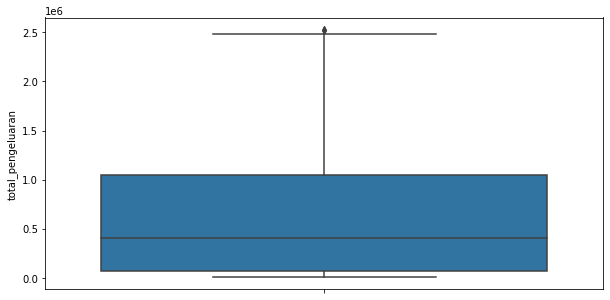

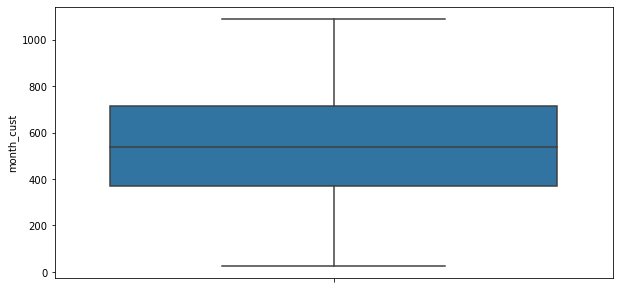

In [102]:
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df_clean_IQR,y=num)

## Encode

In [103]:
df_clean_IQR

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,CVR,jumlah_anak,umur,total_transaksi,total_pengeluaran,month_cust
0,S1,Lajang,58138000.0,0,0,58,635000,88000,546000,172000,...,0,0,0,1,0.142857,0,65,25,1617000,997.0
1,S1,Lajang,46344000.0,1,1,38,11000,1000,6000,2000,...,0,0,0,0,0.000000,2,68,6,27000,151.0
2,S1,Bertunangan,71613000.0,0,0,26,426000,49000,127000,111000,...,0,0,0,0,0.000000,0,57,21,776000,498.0
3,S1,Bertunangan,26646000.0,1,0,26,11000,4000,20000,10000,...,0,0,0,0,0.000000,1,38,8,53000,91.0
4,S3,Menikah,58293000.0,1,0,94,173000,43000,118000,46000,...,0,0,0,0,0.000000,1,41,19,422000,347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,S1,Menikah,34421000.0,1,0,81,3000,3000,7000,6000,...,0,0,0,0,0.000000,1,48,4,30000,724.0
2235,S1,Menikah,61223000.0,0,1,46,709000,43000,182000,42000,...,0,0,0,0,0.000000,1,55,18,1341000,567.0
2237,S1,Cerai,56981000.0,0,0,91,908000,48000,217000,32000,...,0,0,0,0,0.000000,0,41,19,1241000,341.0
2238,S2,Bertunangan,69245000.0,0,1,8,428000,30000,214000,80000,...,0,0,0,0,0.000000,1,66,23,843000,342.0


In [117]:
df_clean_IQR.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'CVR',
       'jumlah_anak', 'umur', 'total_transaksi', 'total_pengeluaran',
       'month_cust'],
      dtype='object')

In [104]:
def onehot_encode(df_clean, columns):
    df_clean = df_clean.copy()
    for column in columns:
        dummies = pd.get_dummies(df_clean[column])
        df_clean = pd.concat([df_clean, dummies], axis=1)
        df_clean.drop(column, axis=1, inplace=True)
    return df_clean

In [105]:
onehot = ['Education','Marital_Status']

In [106]:
X = df_clean_IQR

In [107]:
X = onehot_encode(X,onehot)

In [108]:
X

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,S1,S2,S3,SMA,Bertunangan,Cerai,Duda,Janda,Lajang,Menikah
0,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,...,1,0,0,0,0,0,0,0,1,0
1,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,...,1,0,0,0,0,0,0,0,1,0
2,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,...,1,0,0,0,1,0,0,0,0,0
3,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,...,1,0,0,0,1,0,0,0,0,0
4,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,34421000.0,1,0,81,3000,3000,7000,6000,2000,9000,...,1,0,0,0,0,0,0,0,0,1
2235,61223000.0,0,1,46,709000,43000,182000,42000,118000,247000,...,1,0,0,0,0,0,0,0,0,1
2237,56981000.0,0,0,91,908000,48000,217000,32000,12000,24000,...,1,0,0,0,0,1,0,0,0,0
2238,69245000.0,0,1,8,428000,30000,214000,80000,30000,61000,...,0,1,0,0,1,0,0,0,0,0


In [109]:
numeric

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'CVR',
 'jumlah_anak',
 'umur',
 'total_transaksi',
 'total_pengeluaran',
 'month_cust']

In [110]:
scaler_columns = ['Income','Kidhome','Teenhome','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','jumlah_anak','umur','total_transaksi','total_pengeluaran','month_cust']

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
for i in range (0,len(scaler_columns)):
    columns = scaler_columns[i]
    scaler = StandardScaler()
    scaler.fit(X[columns].values.reshape(-1, 1))
    X[columns] = scaler.transform( X[columns].values.reshape(-1, 1))

In [119]:
X

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,S1,S2,S3,SMA,Bertunangan,Cerai,Duda,Janda,Lajang,Menikah
0,0.315000,-0.825263,-0.926567,0.315547,0.975491,1.553724,1.768670,2.422523,1.457767,0.846184,...,1,0,0,0,0,0,0,0,1,0
1,-0.261869,1.137821,0.970732,-0.376964,-0.878421,-0.643695,-0.735337,-0.658588,-0.639607,-0.741344,...,1,0,0,0,0,0,0,0,1,0
2,0.974091,-0.825263,-0.926567,-0.792471,0.354549,0.568674,-0.174254,1.316948,-0.157452,-0.044380,...,1,0,0,0,1,0,0,0,0,0
3,-1.225339,1.137821,-0.926567,-0.792471,-0.878421,-0.567922,-0.670419,-0.513594,-0.591392,-0.760704,...,1,0,0,0,1,0,0,0,0,0
4,0.322582,1.137821,-0.926567,1.562068,-0.397117,0.417128,-0.215988,0.138876,-0.012806,-0.567103,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,-0.845048,1.137821,-0.926567,1.111935,-0.902189,-0.593179,-0.730700,-0.586091,-0.615500,-0.683264,...,1,0,0,0,0,0,0,0,0,1
2235,0.465894,-0.825263,0.970732,-0.099960,1.195345,0.417128,0.080784,0.066379,2.181000,3.924441,...,1,0,0,0,0,0,0,0,0,1
2237,0.258409,-0.825263,-0.926567,1.458191,1.786577,0.543417,0.243080,-0.114862,-0.374422,-0.392862,...,1,0,0,0,0,1,0,0,0,0
2238,0.858267,-0.825263,0.970732,-1.415731,0.360491,0.088778,0.229169,0.755098,0.059517,0.323462,...,0,1,0,0,1,0,0,0,0,0
